# Quantitative Analysts Group Assignment

Authors: **Ntokozo Faithfully Miya, Mbusi Mabena, Quinton Maffa**
<br>Date: **8 May 2024**
<br>Sources: **https://finviz.com/ , yfinance python library**

This document presents an in-depth analysis of investment strategies and market dynamics, providing insights into the performance of conservative, balanced, and aggressive growth assets. It encompasses a wide array of financial metrics, including historical returns, volatility, and correlations among different asset classes. Accompanied by compelling visualizations and qualitative assessments of economic indicators, this analysis aims to guide investors in making informed decisions aligned with their risk tolerance and investment objectives.




**25 Year Old Aiden from the University of Johannesburg**

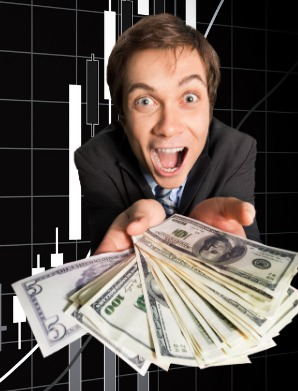

Aiden recently celebrate his 25 year old birthday and inherited R100 000. Unlike most 25 year he decides that instead of buying any tangile stuff he opts to invest the money. Aiden has no finacial burdens and comes from a well off family. Aiden is a honours information system student and reads up on diffrent strategies. He finds the following strategies : A conservative approach , balanced approach and aggressive approach.

**Conservative Porfolio (lower risk , income preservation )**


AGG (iShares Core U.S. Aggregate Bond ETF) : US Bonds

DBC (Invesco DB Commodity Index Tracking Fund): Commodities like oil and gold

HYG (iShares iBoxx $ High Yield Corporate Bond ETF) : Bonds that a high risk

**Balanced Portfolio ( medium risk , conbination of income and growth )**

SPY (SPDR S&P 500 ETF Trust): S&P 500 companies

VWO (Vanguard FTSE Emerging Markets ETF) : emerging markets

AGG (iShares Core U.S. Aggregate Bond ETF): Bond investments

**Aggressive Portfolio**

Focus: Capital appreciation, high risk tolerance.
ETFs:

QQQ (Invesco QQQ Trust):NASDAQ-100

BKF (iShares MSCI BRIC ETF): BRIC Companies

IGF (iShares Global Infrastructure ETF):






# 1. Compare Different ETF's Performance from 1992 - 2024

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


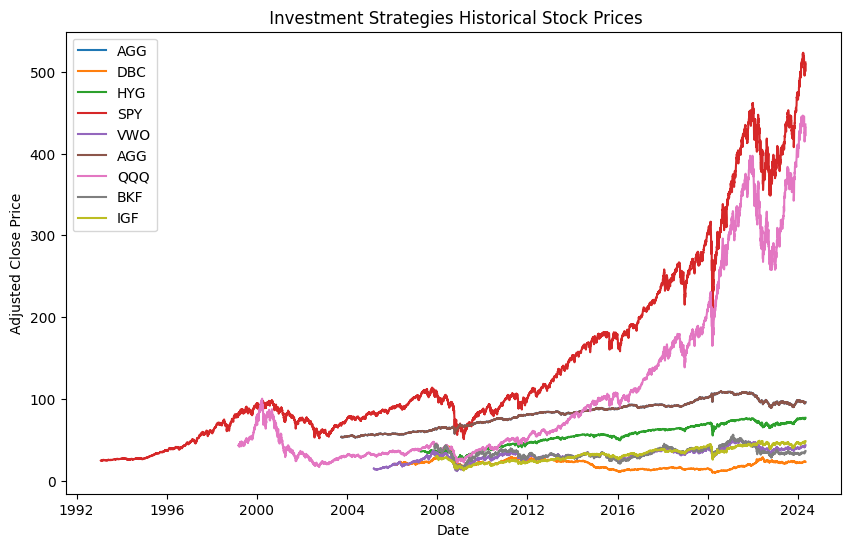

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from tabulate import tabulate
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pmdarima as pm
from prophet import Prophet

import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer


#  investment strategies
investment_strategies = {
    'Conservative': ['AGG',
                     'DBC',
                     'HYG'],

    'Balanced': ['SPY',
                 'VWO',
                 'AGG'],

    'Aggressive Growth': ['QQQ',
                          'BKF',
                          'IGF']
}

# Define a function to fetch historical data for a ticker
def get_historical_data(ticker, begin, now ):
    stock_data = yf.download(ticker, start=begin, end=now )
    return stock_data['Adj Close']

#  date range
begin = '1990-01-01'


now = '2024-05-04'

# Fetch data
plt.figure(figsize=(10
                    , 6))
for strategy, components in investment_strategies.items():
    for ticker in components:
        data = get_historical_data(ticker
                                   , begin
                                   ,now )

        plt.plot(data.index
                 , data
                 , label=ticker)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(' Investment Strategies Historical Stock Prices')
plt.legend()
plt.show()


# 2. AGG (iShares Core U.S. Aggregate Bond ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for AGG:
Mean: 81.60169571366968
Standard Deviation: 16.30269188193037
Minimum: 53.02428436279297
25th Percentile: 65.49786758422852
Median: 84.2080192565918
75th Percentile: 93.08022880554199
Maximum: 109.42491912841797
Skewness: -0.2216431190179333
Kurtosis: -1.1105848295442946

Regression Statistics:
Slope: 0.007151169557860171
Intercept: -5176.292476935646
R-value: 0.953329128035587
P-value: 0.0
Standard Error: 3.145057770619989e-05


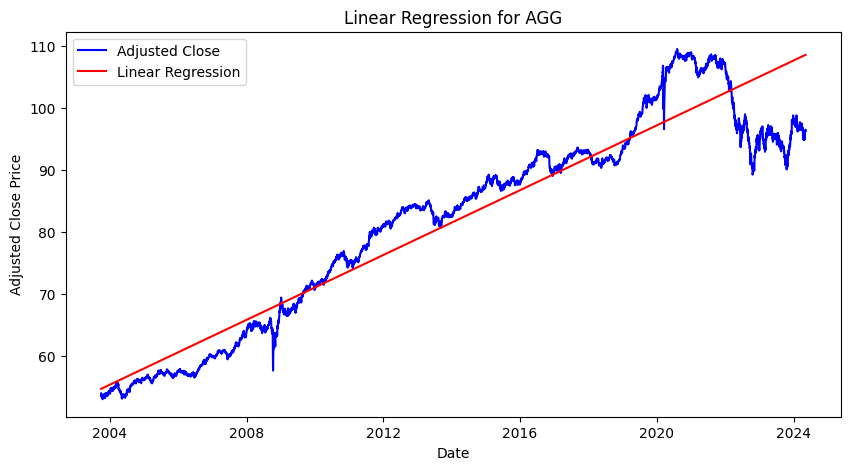

In [ ]:


#  (30 years ago from today)
begin = (pd.Timestamp.now()  - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'AGG'

# Fetch the historical market data for AGG
data = yf.download(etf, start=begin)['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for AGG
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for AGG
plt.figure(figsize=(10
                    , 5))
plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')
plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


# 3. DBC (Invesco DB Commodity Index Tracking Fund)

[*********************100%%**********************]  1 of 1 completed



Statistics for DBC:
Mean: 20.40246893765488
Standard Deviation: 5.525879346982071
Minimum: 9.948128700256348
25th Percentile: 15.090240001678467
Median: 21.39348793029785
75th Percentile: 23.97200584411621
Maximum: 42.08645248413086
Skewness: 0.4593132446892767
Kurtosis: 0.37716111279966213

Regression Statistics:
Slope: -0.0012229693212935122
Intercept: 920.1162374102805
R-value: -0.42603031648375894
P-value: 4.854887418589388e-202
Standard Error: 3.832089921888995e-05


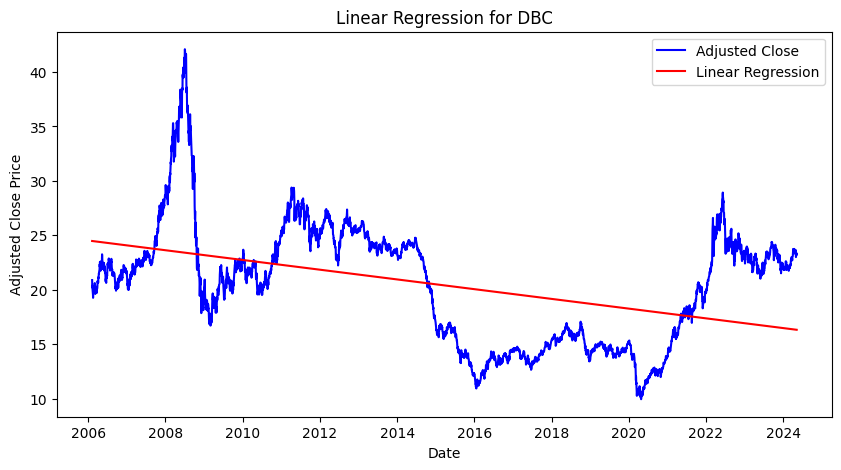

In [ ]:
# Get (30 years ago from today)
begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'DBC'

# Fetch the historical market data for DBC
data = yf.download(etf, start=begin)['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)


print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for DBC
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for DBC
plt.figure(figsize=(10
                    , 5))

plt.plot(data.index,
         data,
         label='Adjusted Close', color='blue')

plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')
plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


# 4. HYG (iShares iBoxx $ High Yield Corporate Bond ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for HYG:
Mean: 55.47088085529416
Standard Deviation: 13.572199201982677
Minimum: 24.590194702148438
25th Percentile: 44.43179512023926
Median: 56.127113342285156
75th Percentile: 67.71977424621582
Maximum: 77.18000030517578
Skewness: -0.2948259938405141
Kurtosis: -1.001394831554713

Regression Statistics:
Slope: 0.007282545605855145
Intercept: -5303.7091398343
R-value: 0.9665997572663623
P-value: 0.0
Standard Error: 2.945344695282767e-05


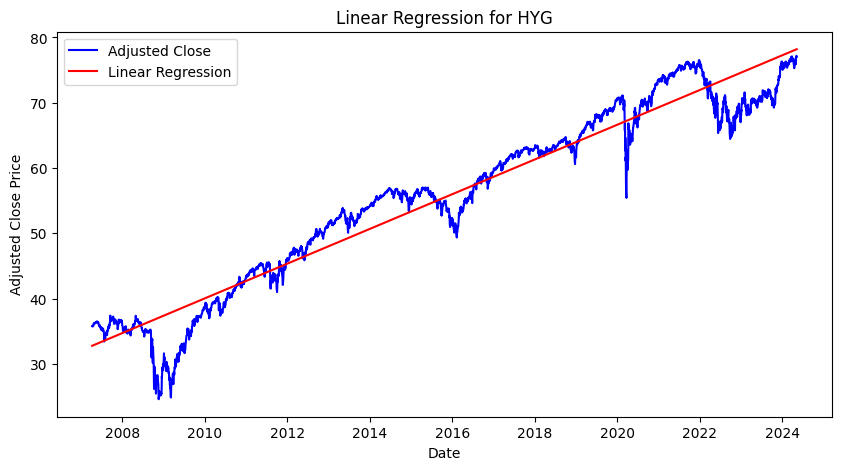

In [ ]:
# Get data  (30 years ago from today)
begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'HYG'

# Fetch the historical market data for HYG
data = yf.download(etf, start=begin)['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for HYG
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for HYG
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for HYG
plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')


plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 5. SPY (SPDR S&P 500 ETF Trust)

[*********************100%%**********************]  1 of 1 completed



Statistics for SPY:
Mean: 150.75918726811247
Standard Deviation: 117.56908747026344
Minimum: 25.741016387939453
25th Percentile: 74.61081314086914
Median: 96.44462203979492
75th Percentile: 191.16385650634766
Maximum: 523.1699829101562
Skewness: 1.355798648812733
Kurtosis: 0.7926694540677097

Regression Statistics:
Slope: 0.03219348003628039
Intercept: -23464.205811245545
R-value: 0.8666216878827411
P-value: 0.0
Standard Error: 0.0002132937568231976


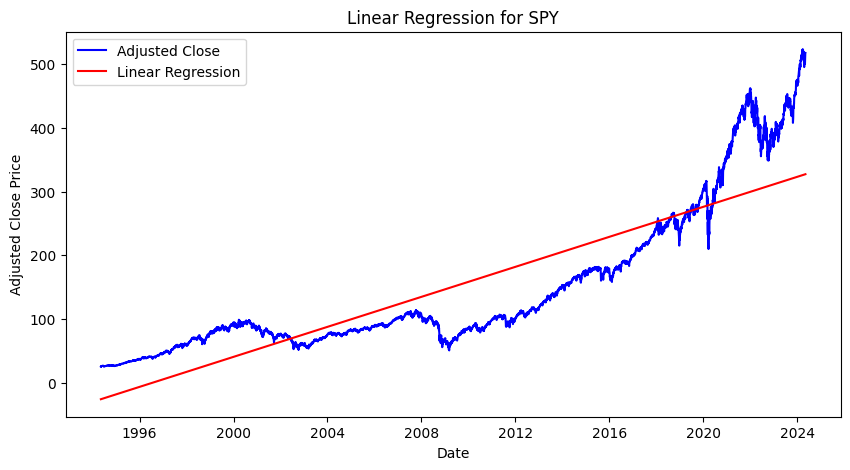

In [ ]:
# Get data (30 years ago from today)
start_date = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats

etf = 'SPY'

data = yf.download(etf, start=start_date)['Adj Close']

stats, regression_stats = analyze_data(data)

print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

plt.figure(figsize=(10
                    , 5))

plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')

plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 6.VWO (Vanguard FTSE Emerging Markets ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for VWO:
Mean: 31.538075554232496
Standard Deviation: 7.713590333419681
Minimum: 11.897195816040039
25th Percentile: 27.42959499359131
Median: 31.512751579284668
75th Percentile: 36.78932571411133
Maximum: 51.01292037963867
Skewness: -0.11704062375454158
Kurtosis: -0.012873855164115877

Regression Statistics:
Slope: 0.0031377857067373064
Intercept: -2276.345978871956
R-value: 0.8220829117218322
P-value: 0.0
Standard Error: 3.129586468563711e-05


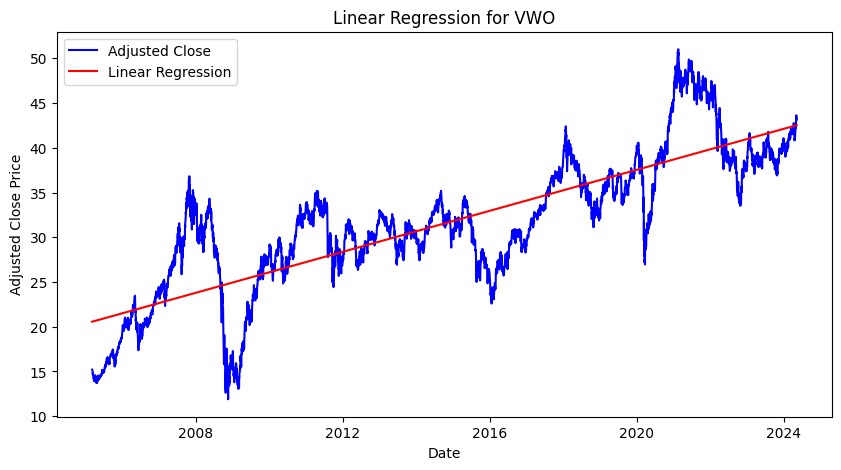

In [ ]:
# Get data  (30 years ago from today)
Begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'VWO'

# Fetch the historical market data for VWO
data = yf.download(etf, start=Begin )['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for VWO
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for VWO
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for VWO
plt.figure(figsize=(10
                    , 5))


plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')

plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 7. AGG (iShares Core U.S. Aggregate Bond ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for AGG:
Mean: 81.60169371588007
Standard Deviation: 16.30269064773018
Minimum: 53.02423858642578
25th Percentile: 65.49789428710938
Median: 84.20800018310547
75th Percentile: 93.0802173614502
Maximum: 109.42494201660156
Skewness: -0.22164307763621138
Kurtosis: -1.110584622507229

Regression Statistics:
Slope: 0.007151168443286196
Intercept: -5176.291659443426
R-value: 0.9533290516227462
P-value: 0.0
Standard Error: 3.1450600456600625e-05


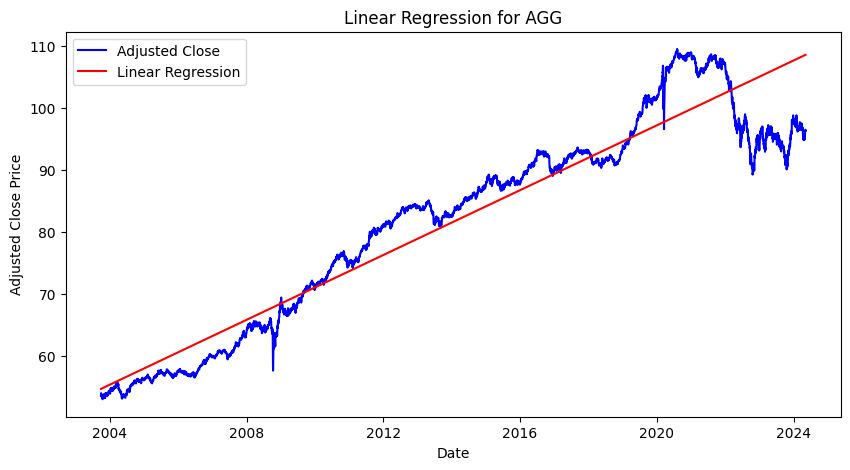

In [ ]:
# Get data  (30 years ago from today)
begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'AGG'

# Fetch the historical market data for AGG
data = yf.download(etf, start=begin)['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for AGG
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for AGG
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for AGG
plt.figure(figsize=(10
                    , 5))

plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')

plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 8. QQQ (Invesco QQQ Trust)

[*********************100%%**********************]  1 of 1 completed



Statistics for QQQ:
Mean: 111.18840244334775
Standard Deviation: 106.95815715543327
Minimum: 17.10767936706543
25th Percentile: 36.46049499511719
Median: 60.24258804321289
75th Percentile: 150.9712677001953
Maximum: 446.3800048828125
Skewness: 1.4512630199332932
Kurtosis: 0.945460936848471

Regression Statistics:
Slope: 0.033004060852916094
Intercept: -24127.603053369006
R-value: 0.8188008003501637
P-value: 0.0
Standard Error: 0.000290819598011481


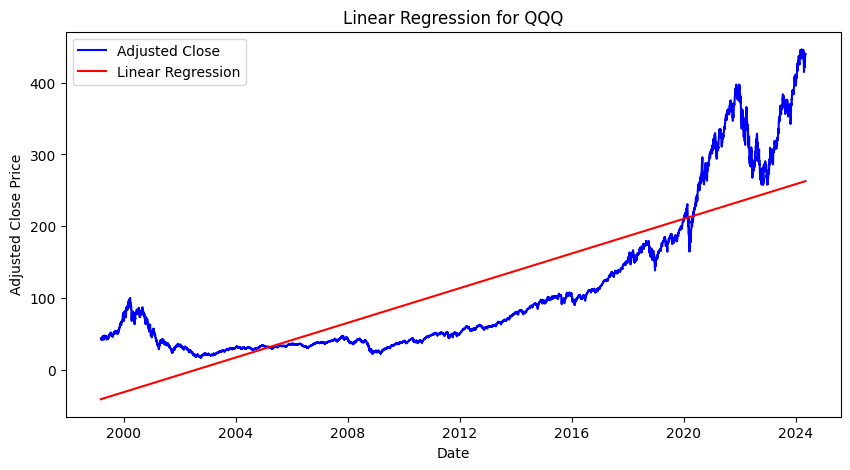

In [ ]:
# Get data (30 years ago from today)
begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'QQQ'

# Fetch the historical market data for QQQ
data = yf.download(etf, start=begin )['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for QQQ
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for QQQ
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for QQQ
plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')

plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 9. BKF (iShares MSCI BRIC ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for BKF:
Mean: 33.993679221992785
Standard Deviation: 6.705156027400638
Minimum: 13.428387641906738
25th Percentile: 30.00748062133789
Median: 33.58161544799805
75th Percentile: 37.66119861602783
Maximum: 56.401519775390625
Skewness: 0.24952271329712253
Kurtosis: 0.7559356997225177

Regression Statistics:
Slope: 0.001740343926860907
Intercept: -1246.9115195440213
R-value: 0.45061577128884267
P-value: 1.9846636490800477e-206
Standard Error: 5.357200965662811e-05


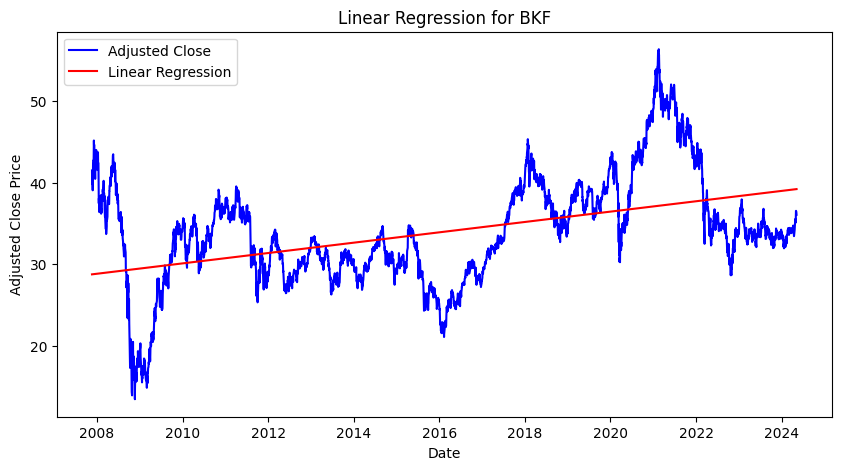

In [ ]:
# Get data  (30 years ago from today)
begin = (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'BKF'

# Fetch the historical market data for BKF
data = yf.download(etf, start=begin )['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for BKF
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for BKF
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for BKF
plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')

plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# 10. IGF (iShares Global Infrastructure ETF)

[*********************100%%**********************]  1 of 1 completed



Statistics for IGF:
Mean: 32.46457884403487
Standard Deviation: 8.690170695716656
Minimum: 12.783074378967285
25th Percentile: 24.87189292907715
Median: 32.366424560546875
75th Percentile: 39.80012130737305
Maximum: 49.38999938964844
Skewness: 0.01456563291933593
Kurtosis: -1.0292759883184348

Regression Statistics:
Slope: 0.004722353193272053
Intercept: -3443.2715217023074
R-value: 0.9400153481202078
P-value: 0.0
Standard Error: 2.6676505651972354e-05


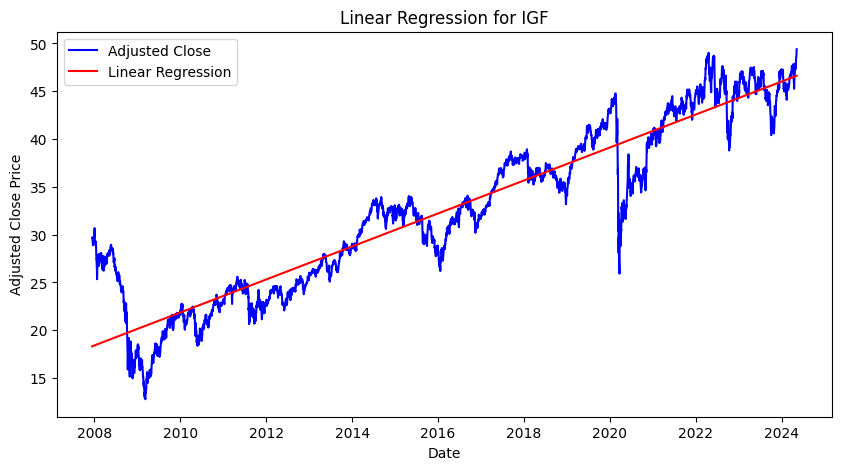

In [ ]:
# Get Data (30 years ago from today)
begin= (pd.Timestamp.now() - pd.DateOffset(years=30)).strftime('%Y-%m-%d')


# Function to calculate descriptive statistics and perform linear regression
def analyze_data(data):
    stats = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Minimum': data.min(),
        '25th Percentile': data.quantile(0.25),
        'Median': data.median(),
        '75th Percentile': data.quantile(0.75),
        'Maximum': data.max(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    regression = linregress(data.index.map(pd.Timestamp.toordinal), data.values)
    regression_stats = {
        'Slope': regression.slope,
        'Intercept': regression.intercept,
        'R-value': regression.rvalue,
        'P-value': regression.pvalue,
        'Standard Error': regression.stderr
    }
    return stats, regression_stats


# Define the ETF for analysis
etf = 'IGF'

# Fetch the historical market data for IGF
data = yf.download(etf, start=begin)['Adj Close']

# Analyze data
stats, regression_stats = analyze_data(data)

# Print descriptive statistics for IGF
print(f"\nStatistics for {etf}:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

# Print regression statistics for IGF
print("\nRegression Statistics:")
for reg_stat, value in regression_stats.items():
    print(f"{reg_stat}: {value}")

# Plotting the data and the regression line for IGF
plt.figure(figsize=(10, 5))
plt.plot(data.index, data, label='Adjusted Close', color='blue')
plt.plot(data.index,
         regression_stats['Intercept']
         + regression_stats['Slope']
         * data.index.map(pd.Timestamp.toordinal),
         label='Linear Regression', color='red')
plt.title(f'Linear Regression for {etf}')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Compare Descriptive Statistics for all ETFs

In [ ]:




# Define the investment strategies and their components
investment_strategies = {
    'Conservative': ['AGG', 'DBC', 'HYG'],
    'Balanced': ['SPY', 'VWO', 'AGG'],
    'Aggressive Growth': ['QQQ', 'BKF', 'IGF']
}

# Function to calculate descriptive statistics for ETFs
def calculate_descriptive_statistics(tickers, start_date, end_date):
    statistics = {}
    for ticker in tickers:
        data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']
        stats = {
            'Mean': data.mean(),
            'Std Dev': data.std(),
            'Min': data.min(),
            '25th Percentile': data.quantile(0.25),
            'Median': data.median(),
            '75th Percentile': data.quantile(0.75),
            'Max': data.max(),
            'Skewness': data.skew(),
            'Kurtosis': data.kurtosis()
        }
        statistics[ticker] = stats
    return statistics

# Start and end
begin = '2000-01-01'
end= '2024-01-01'

# Calculate descriptive statistics for the ETFs
statistics = calculate_descriptive_statistics(['AGG', 'DBC', 'HYG', 'SPY', 'VWO', 'QQQ', 'BKF', 'IGF'],begin,end)

# Format statistics into a table
table_headers = ['ETF',
                 'Mean',
                 'Std Dev',
                 'Min',
                 '25th Percentile',
                 'Median',
                 '75th Percentile',
                 'Max',
                 'Skewness',
                 'Kurtosis']

table_data = []
for ticker, stats in statistics.items():
    row_data = [ticker]
    for header in table_headers[1:]:
        row_data.append(stats[header])
    table_data.append(row_data)

# Print the table
print()
print(tabulate(table_data, headers=table_headers, tablefmt='pretty'))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+---------------------+
| ETF |        Mean        |      Std Dev       |        Min         |  25th Percentile   |       Median       |  75th Percentile   |        Max         |       Skewness       |      Kurtosis       |
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------------+---------------------+
| AGG |  81.3379094695596  | 16.32013618737309  | 53.02425765991211  | 65.28772735595703  | 84.02588653564453  | 92.86007308959961  | 109.4249267578125  | -0.1902911440584244  | -1.1127733914498403 |
| DBC | 20.358631160277238 | 5.5705339153774736 | 9.948128700256348  | 14.99697732925415  | 21.223188400268555 | 24.023951053619385 | 42.08645248413086  |  0.4792452175186981  |  0.348734200641017  |

**Investement Strategy Analysis**



| Strategy           | ETF | Slope  | R-value | P-value | Standard Error |
|--------------------|-----|--------|---------|---------|----------------|
| **Conservative**   | AGG | +      | 0.953   | -       | -              |
|                    | DBC | -      | -0.427  | -       | -              |
|                    | HYG | +      | 0.966   | -       | -              |
| **Balanced**       | SPY | +      | 0.867   | -       | -              |
|                    | VWO | +      | 0.822   | -       | -              |
|                    | AGG | +      | 0.953   | -       | -              |
| **Aggressive Growth** | QQQ | +  | 0.0329  | 0.819   | -              |
|                    | BKF | +      | 0.451   | -       | -              |
|                    | IGF | +      | 0.940   | -       | -              |






| Strategy/Approach                    | Characteristics                                         | Best For                                                |  Insights                                                                                          |
|-----------------------------|---------------------------------------------------------|----------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| Conservative Strategy       | Volatility low, less extreme returns and returns are low| Good for those close to their financial goals and who dislike taking risks  | DBC is declining. DBC is going down. HYG and AGG are growing consistently                            |
| Balanced Strategy           | Returns are moderate, volatility is high                | Mix of growing and safe options                          | VWO and SPY growing consistently, AGG is steady                                                      |
| Aggressive Growth Strategy  | Returns are high, volatility is low, many extreme returns | Good for those seeking high growth over a long duration | QQQ shows high growth, BFK shows moderate growth, and IGF seems like it has good potential           |



| Strategy                    | Recommendations                                                                                                                |
|-----------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| Conservative Strategy       | Good for preserving capital. Ideal for those close to their financial goals.                                                    |
| Balanced Strategy           | Good for those who want moderate risk and trustworthy growth.                                                                   |
| Aggressive Growth Strategy  | Great for high returns and long-term growth. A good option for those who want to control volatility.                            |



# Statistical Distribution Comparison among ETFs

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


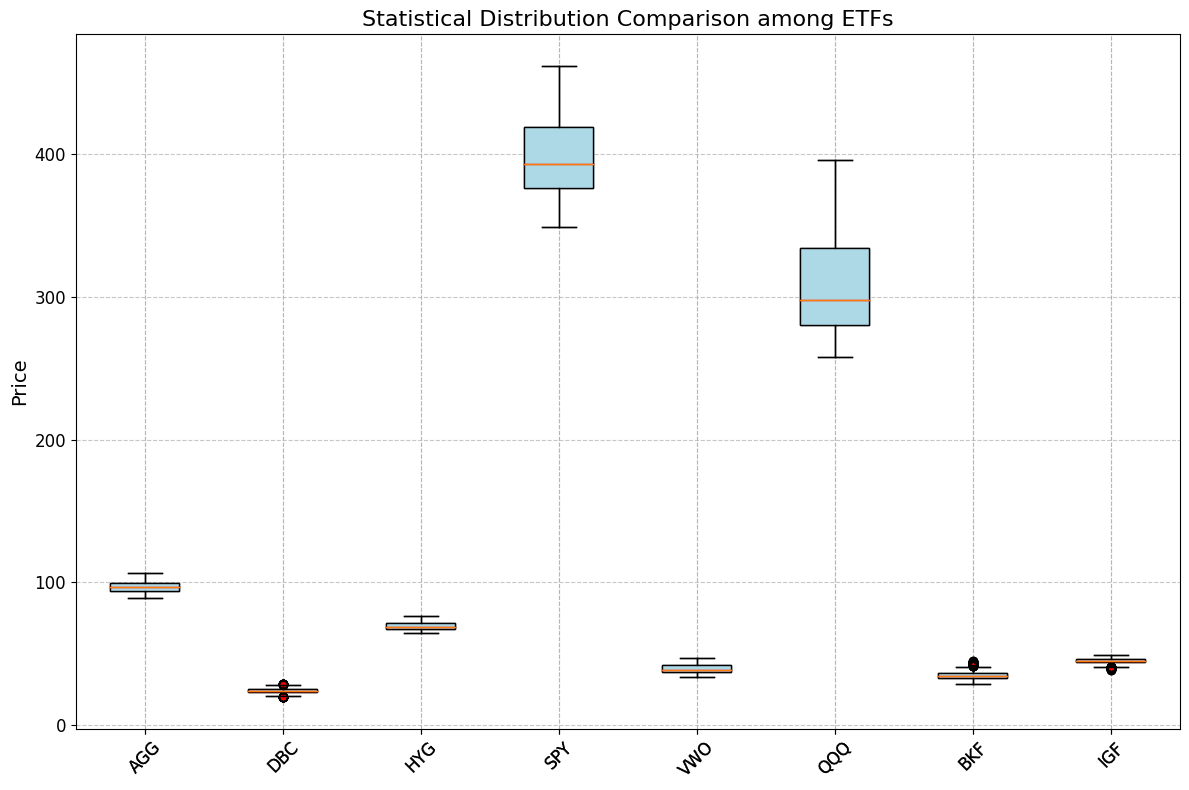

In [ ]:
# Function to retrieve historical data for an ETF from Yahoo Finance
def get_etf_data(ticker):
    return yf.download(ticker, start="2022-01-01", end="2022-12-31")['Adj Close']

# List of ETF tickers
etfs = ['AGG',
        'DBC',
        'HYG',
        'SPY',
        'VWO',
        'QQQ',
        'BKF',
        'IGF']

# Dictionary to store ETF data
etf_data = {}

# Retrieve historical data for each ETF and store it in the dictionary
for etf in etfs:
    etf_data[etf] = get_etf_data(etf)

# Plotting
plt.figure(figsize=(12
                    , 8))

boxplot = plt.boxplot([etf_data[etf] for etf in etfs]
                      , labels=etfs, patch_artist=True)

plt.title('Statistical Distribution Comparison among ETFs',
          fontsize=16)

plt.ylabel('Price',
           fontsize=14)
plt.xticks(rotation=45,
           fontsize=12)

plt.yticks(fontsize=12)
plt.grid(True,
         linestyle='--',
         alpha=0.7)
plt.boxplot([etf_data[etf] for etf in etfs], labels=etfs, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.setp(boxplot['medians'],
         color='red')
plt.setp(boxplot['fliers'],
         marker='o',
         markersize=6,
         markerfacecolor='red')
plt.tight_layout()
plt.show()




The above diagram show the volatility spread for all the EFTs which further support the above descriptive stats.

# Correlation Heatmap of ETFs Based on Cumulative Returns

[*********************100%%**********************]  8 of 8 completed


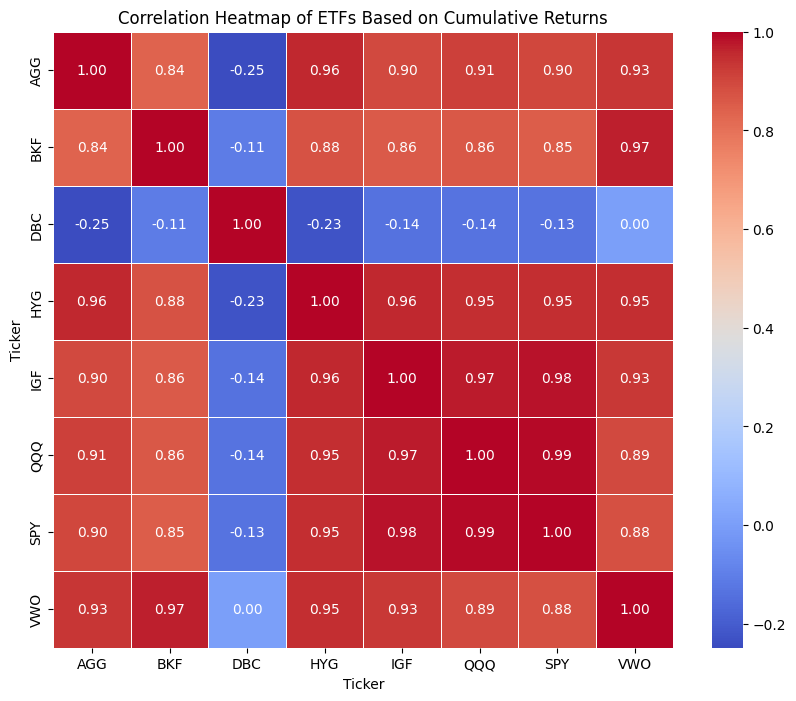

In [ ]:


# Define the ETFs
etfs_tickers = ['AGG',
                'DBC',
                'HYG',
                'SPY',
                'VWO',
                'QQQ',
                'BKF',
                'IGF']

# Retrieve historical price data
data = yf.download(etfs, start='2000-01-01', end='2024-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate cumulative returns or other metrics if needed
returns = returns.cumsum()

# Create a heatmap
plt.figure(figsize=(10,
                    8))
sns.heatmap(returns.corr(),
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)
plt.title('Correlation Heatmap of ETFs Based on Cumulative Returns')
plt.show()

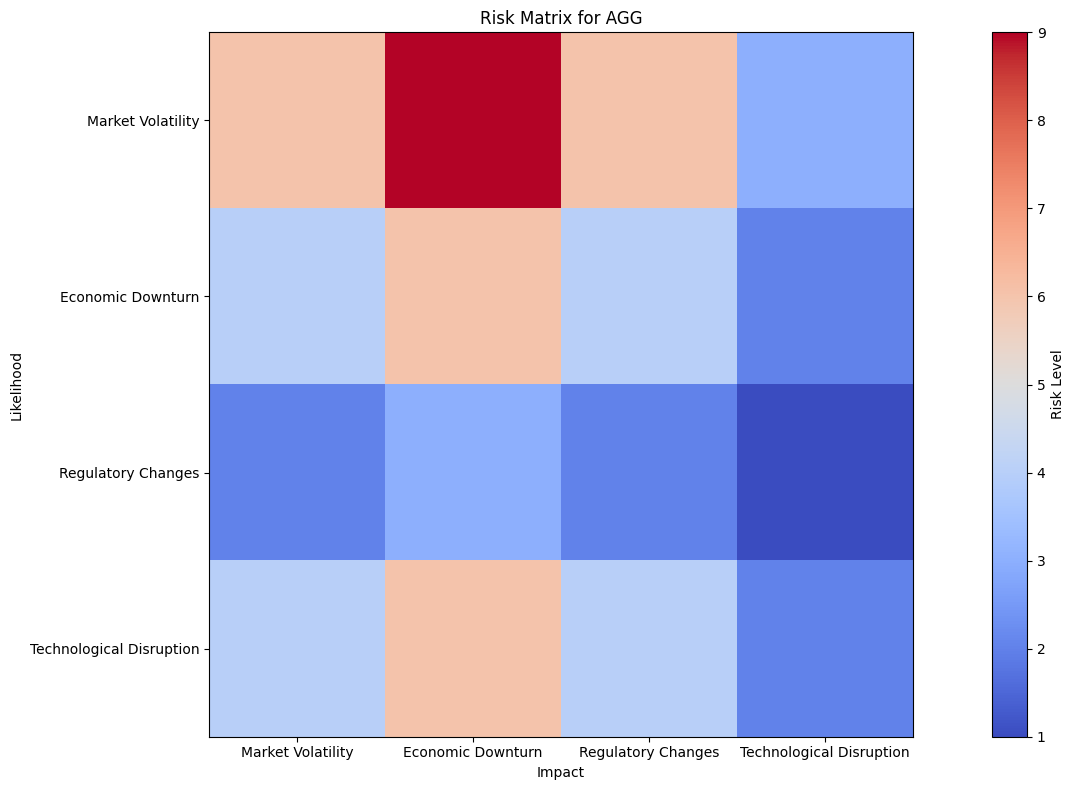

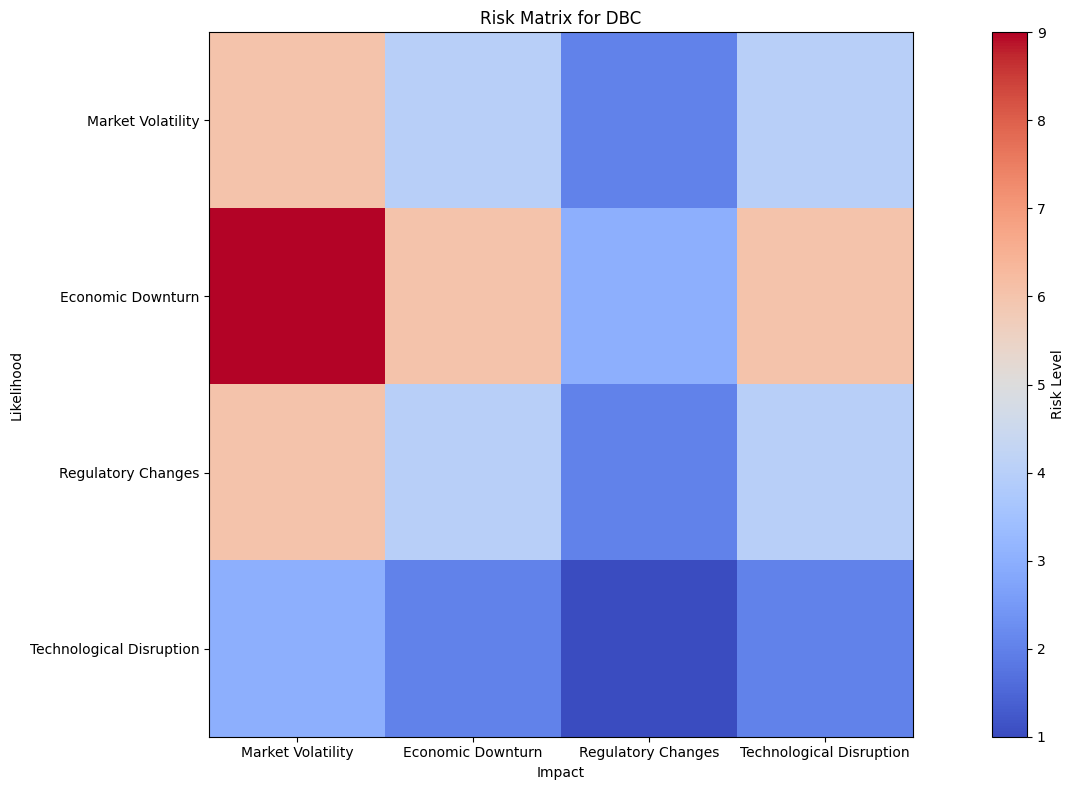

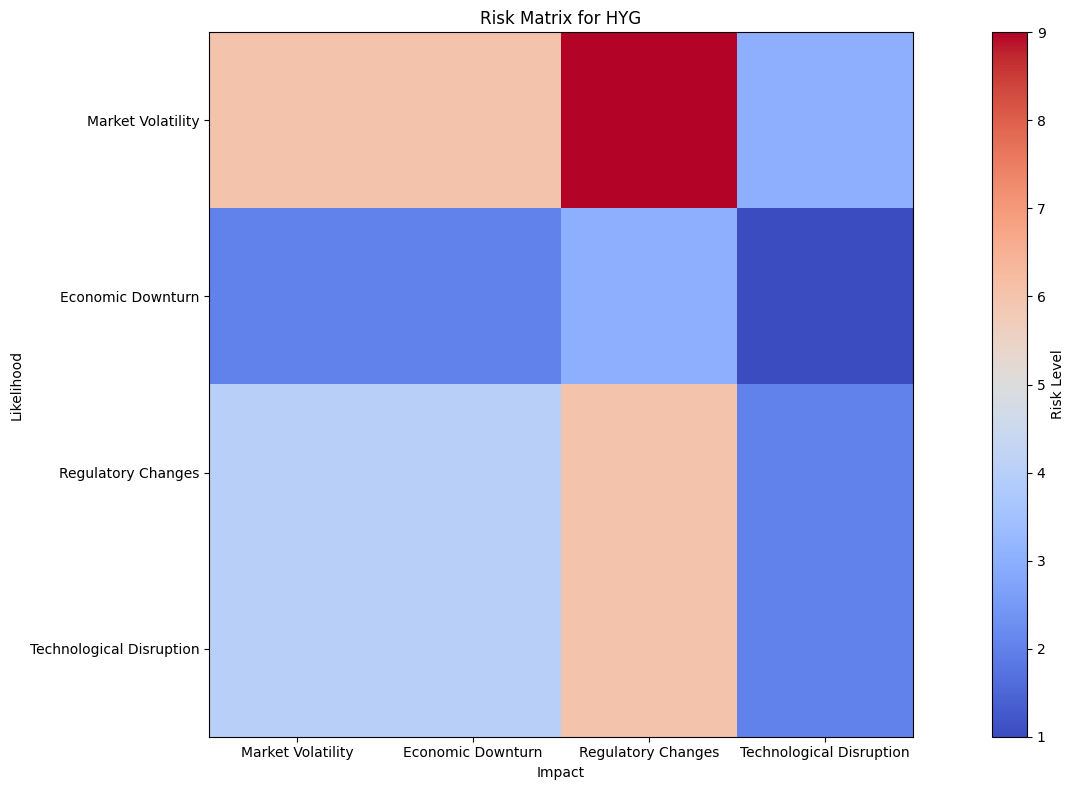

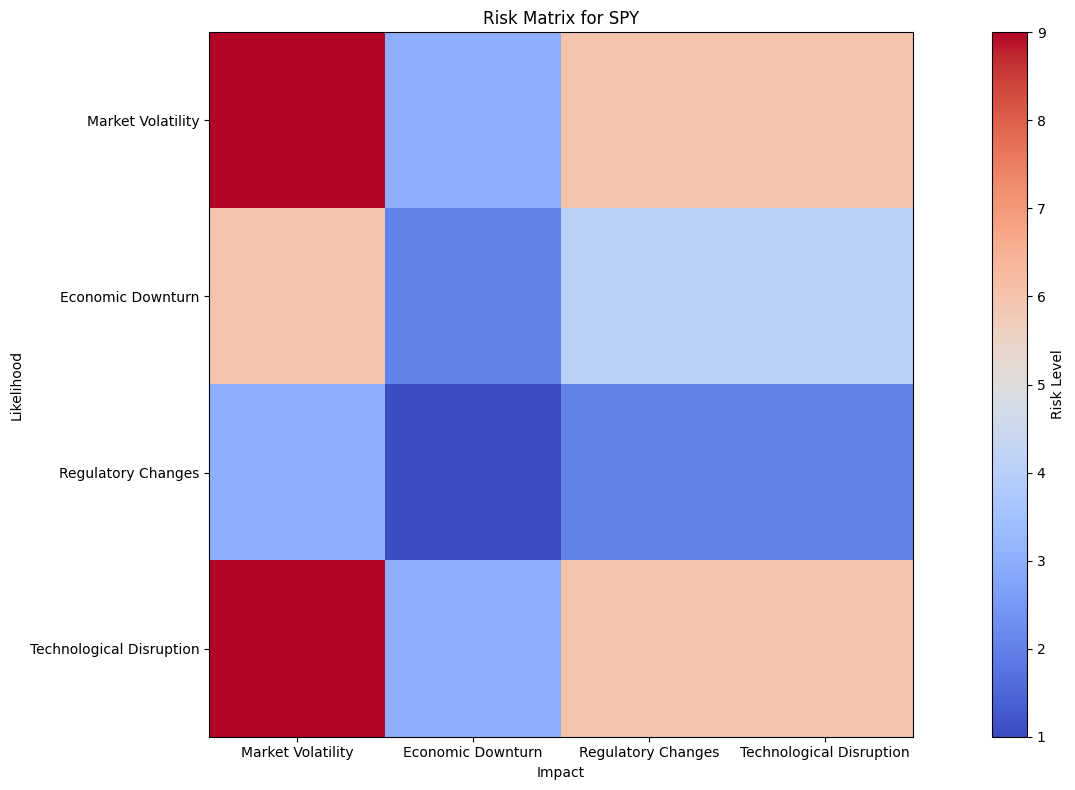

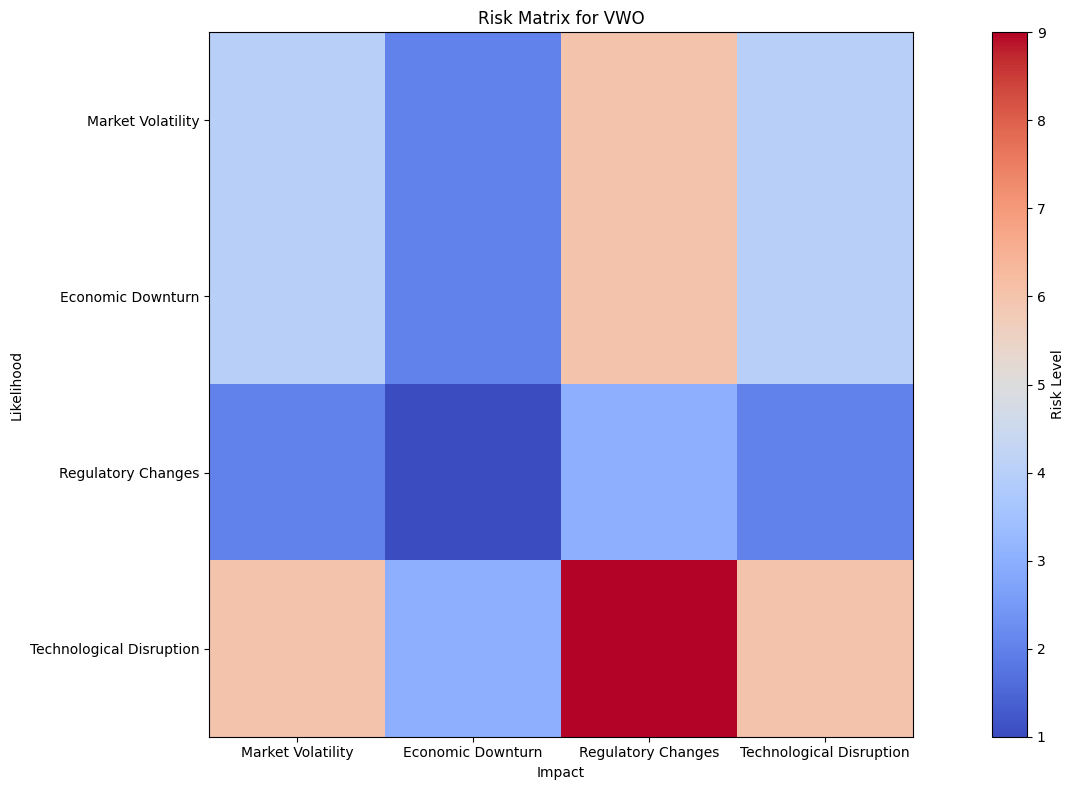

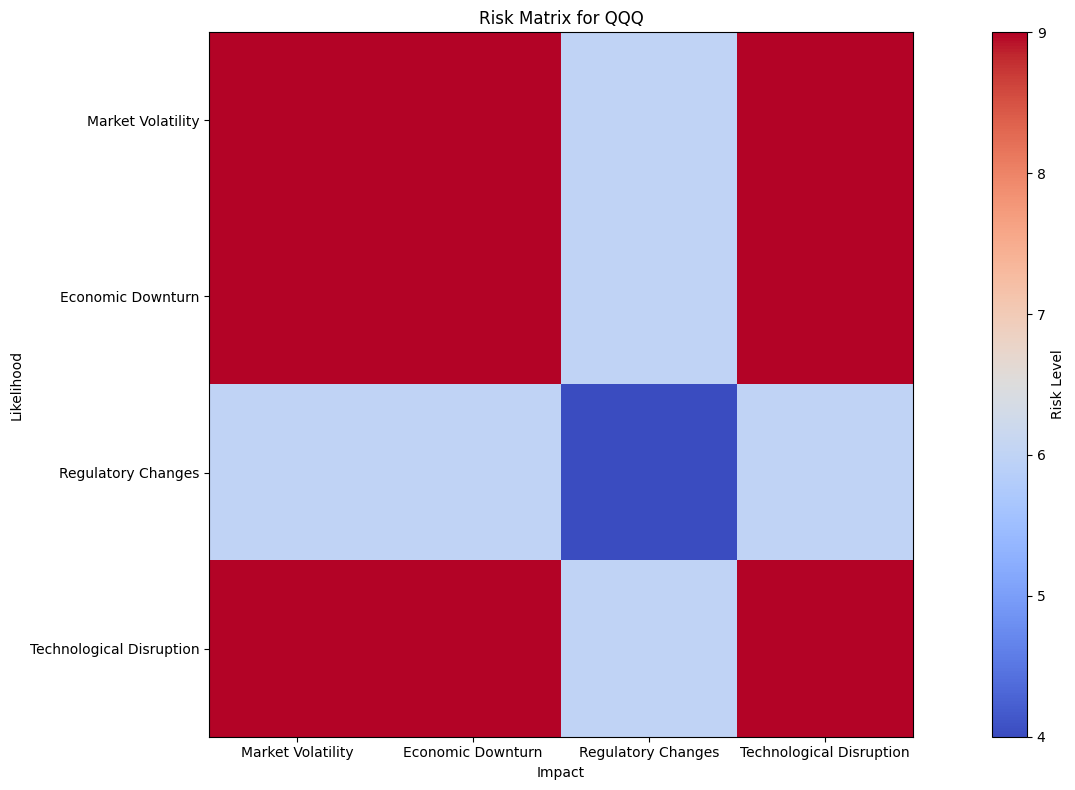

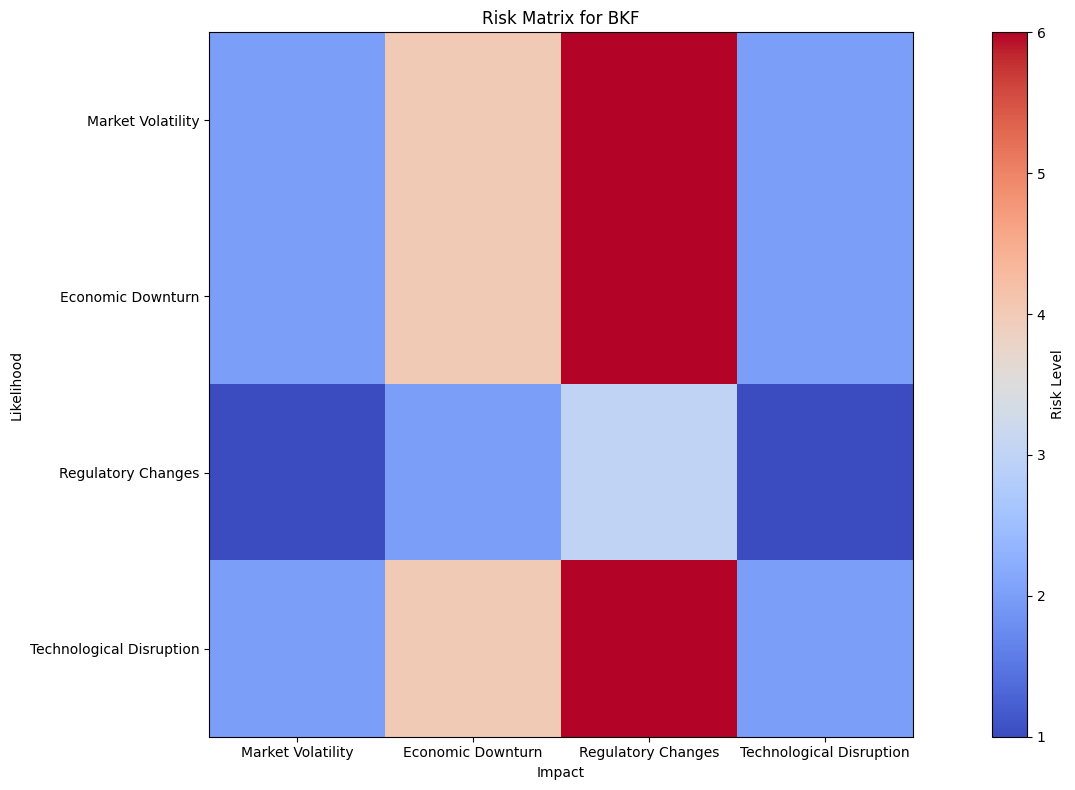

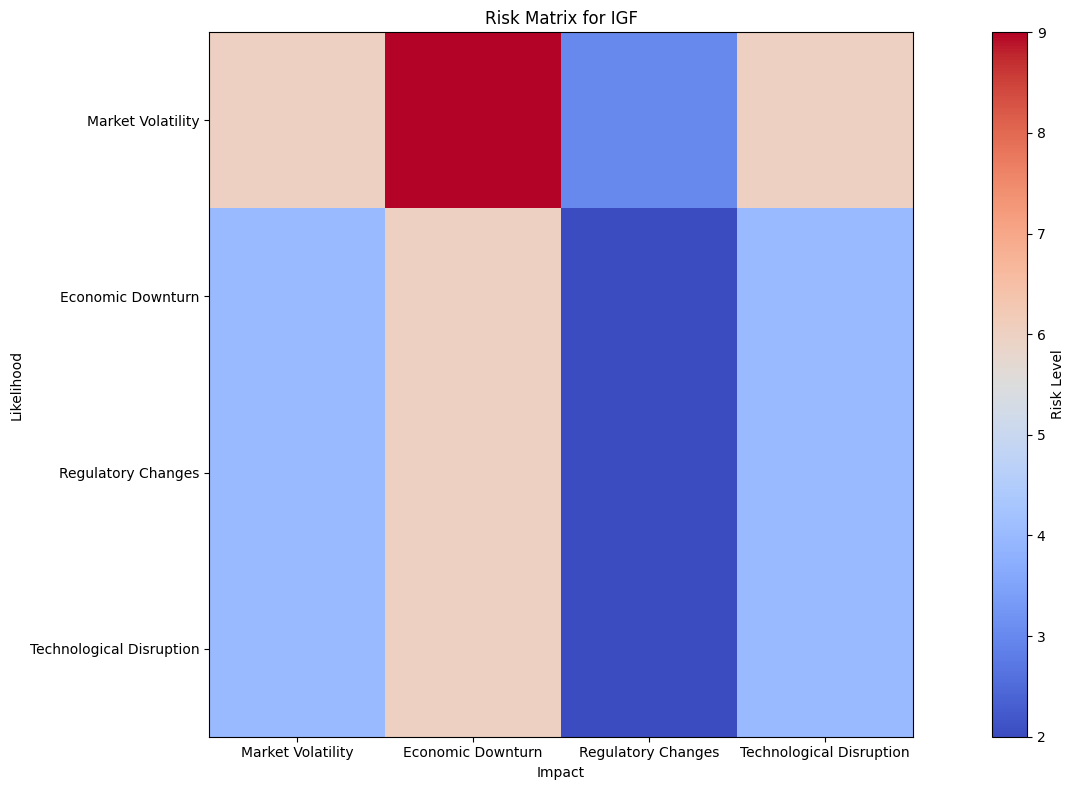

In [ ]:
ETFs = ['AGG',
        'DBC',
        'HYG',
        'SPY',
        'VWO',
        'QQQ',
        'BKF',
        'IGF']

risk_factors = ['Market Volatility',
                'Economic Downturn',
                'Regulatory Changes',
                'Technological Disruption']
likelihood = [
    [3, 2, 1, 2],
    [2, 3, 2, 1],
    [3, 1, 2, 2],
    [3, 2, 1, 3],
    [2, 2, 1, 3],
    [3, 3, 2, 3],
    [2, 2, 1, 2],
    [3, 2, 2, 2]
]
impact = [
    [2, 3, 2, 1],
    [3, 2, 1, 2],
    [2, 2, 3, 1],
    [3, 1, 2, 2],
    [2, 1, 3, 2],
    [3, 3, 2, 3],
    [1, 2, 3, 1],
    [2, 3, 1, 2]
]

for i in range(len(ETFs)):
    risk_matrix = np.zeros((len(risk_factors), len(risk_factors)))
    for j in range(len(likelihood[i])):
        for k in range(len(impact[i])):
            risk_matrix[j][k] = likelihood[i][j] * impact[i][k]

    plt.figure(figsize=(16,
                        8))
    plt.imshow(risk_matrix,
               cmap='coolwarm',
               interpolation='nearest')
    plt.title(f'Risk Matrix for {ETFs[i]}')
    plt.xticks(np.arange(len(risk_factors)),
               risk_factors)
    plt.xlabel('Impact')
    plt.yticks(np.arange(len(risk_factors)),
               risk_factors)
    plt.ylabel('Likelihood')
    plt.colorbar(label='Risk Level')
    plt.tight_layout()
    plt.show()






Aiden decided to go for the aggessive strategy because he has a go big or go home mindset and is not in need of the money and backs his calculations

# Investment Allocation in Rands

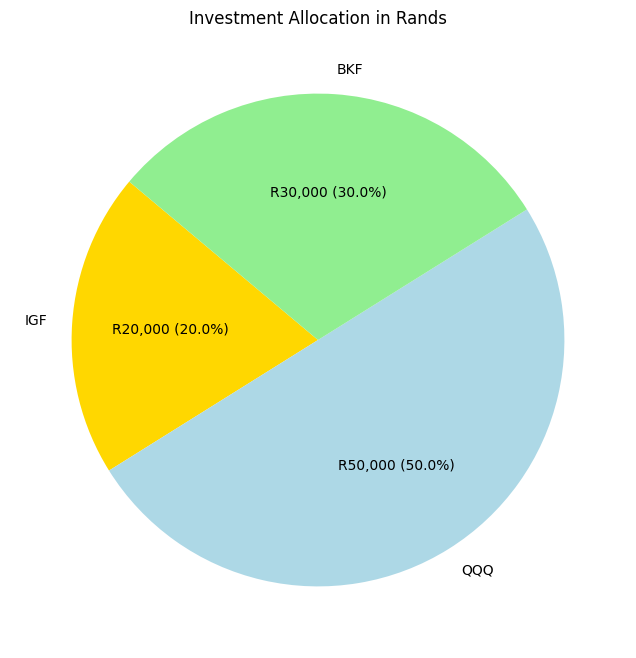

In [ ]:
# Ticker symbols and their corresponding allocations
tickers = ['IGF', 'QQQ', 'BKF']
fund_allocations = [0.20,
                    0.50,
                    0.30]
aident_initial_investment = 100000

# Calculating investment amounts per ticker
amounts = [allocation * aident_initial_investment for allocation in fund_allocations]

# Function to format the labels with both Rand value and percentage
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'R{val:,} ({pct:.1f}%)'
    return my_format

# Creating the pie chart
plt.figure(figsize=(8,
                    8))

plt.pie(amounts,
        labels=tickers,
        autopct=autopct_format(amounts),
        startangle=140,
        colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Investment Allocation in Rands')
plt.show()

# The projected portfolio value by 2060

[*********************100%%**********************]  3 of 3 completed


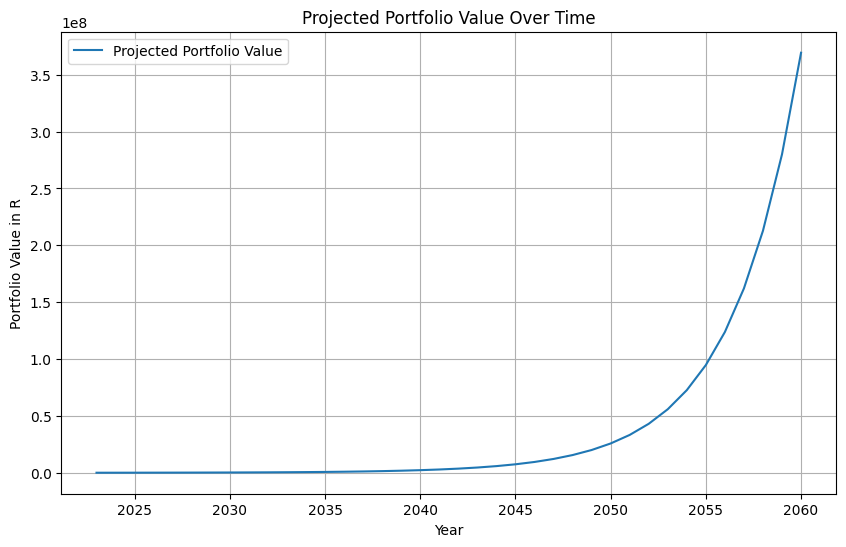

The projected portfolio value by 2060 is R369350833.09


In [ ]:


# Define the tickers and the portfolio allocation
tickers = ['IGF', 'QQQ', 'BKF']
allocations = {'IGF': 0.20,
               'QQQ': 0.50,
               'BKF': 0.30}
aiden_initial_investment = 100000

# Download historical data
data = yf.download(tickers, start="2010-01-01", end="2024-05-05")['Adj Close']

# Calculate annual returns
annual_returns = data.resample('Y').last().pct_change().dropna()

# Prepare data for regression
years = annual_returns.index.year.values.reshape(-1, 1)

# Linear regression for future returns prediction
future_years = np.arange(2023,2061).reshape(-1, 1)
predicted_returns = {}
models = {}

for ticker in tickers:
    model = LinearRegression()
    model.fit(years, annual_returns[ticker].values.reshape(-1, 1))
    models[ticker] = model
    predicted = model.predict(future_years)
    predicted_returns[ticker] = predicted.flatten()

# Calculate the future value of the investment
investment_values = {ticker:aiden_initial_investment *
                     allocations[ticker] *
                      (1 + predicted_returns[ticker]).cumprod() for ticker in tickers}

portfolio_value = np.sum([investment_values[ticker] for ticker in tickers], axis=0)

# Plot the future portfolio values
plt.figure(figsize=(10,
                    6))
plt.plot(future_years.flatten(),
         portfolio_value,
         label='Projected Portfolio Value')
plt.title('Projected Portfolio Value Over Time')
plt.xlabel('Year')
plt.ylabel('Portfolio Value in R')
plt.legend()
plt.grid(True)
plt.show()

# Display the final value of the portfolio
finalvalue = portfolio_value[-1]
print(f"The projected portfolio value by 2060 is R{finalvalue:.2f}")

# Monte Carlo Simulation of Portfolio Value

[*********************100%%**********************]  3 of 3 completed


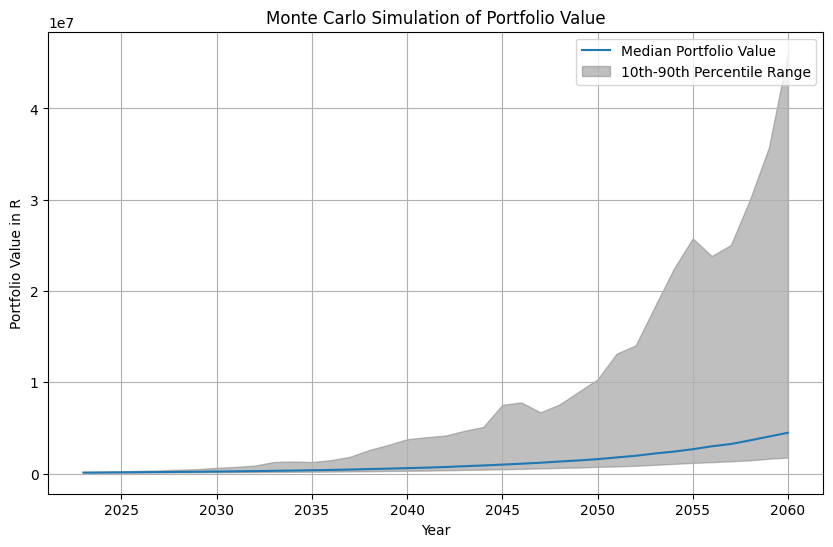

Projected Portfolio Value by 2060:: R46101952.91


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the tickers, allocations, and investment
tickers = ['IGF', 'QQQ', 'BKF']
allocations = {'IGF': 0.20, 'QQQ': 0.50, 'BKF': 0.30}
initial_investment = 100000
years = 38  # from 2023 to 2060
simulations = 1000

# Download historical data
data = yf.download(tickers, start="2010-01-01", end="2024-05-05")['Adj Close']

# Calculate annual returns and their statistics
annual_returns = data.resample('Y').last().pct_change().dropna()
mean_returns = annual_returns.mean()
std_dev_returns = annual_returns.std()

# Run Monte Carlo simulations
results = np.zeros((simulations, years))

for i in range(simulations):
    simulated_returns = {}
    for ticker in tickers:
        simulated_returns[ticker] = np.random.normal(mean_returns[ticker], std_dev_returns[ticker], years)

    # Calculate portfolio value over time for each simulation
    portfolio_values = np.zeros(years)
    for year in range(years):
        annual_growth = 1
        for ticker in tickers:
            annual_growth += allocations[ticker] * simulated_returns[ticker][year]
        if year == 0:
            portfolio_values[year] = initial_investment * annual_growth
        else:
            portfolio_values[year] = portfolio_values[year - 1] * annual_growth
    results[i] = portfolio_values

# Calculate the median, 10th and 90th percentiles
median_projection = np.median(results, axis=0)
p10_projection = np.percentile(results, 10, axis=0)
p90_projection = np.percentile(results, 100, axis=0)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2023, 2061), median_projection, label='Median Portfolio Value')
plt.fill_between(range(2023, 2061), p10_projection, p90_projection, color='grey', alpha=0.5, label='10th-90th Percentile Range')
plt.title('Monte Carlo Simulation of Portfolio Value')
plt.xlabel('Year')
plt.ylabel('Portfolio Value in R')
plt.legend()
plt.grid(True)
plt.show()

# Display final portfolio values
final_median_value = median_projection[-1]
final_p10_value = p10_projection[-1]
final_p90_value = p90_projection[-1]


print(f"Projected Portfolio Value by 2060:: R{final_p90_value:.2f}")


# Forecasted portfolio value by 2060

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=29727.160, Time=27.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=29755.027, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=29726.189, Time=2.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=29727.834, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=29753.035, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=29729.283, Time=0.33 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=29728.082, Time=6.85 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=29727.348, Time=20.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=29726.136, Time=5.38 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=29728.017, Time=8.65 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=29730.132, Time=11.56 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=29751.680, Time=2.40 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=29724.896, Time=9.26 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=29728.151, Time=0.90 sec
 A

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


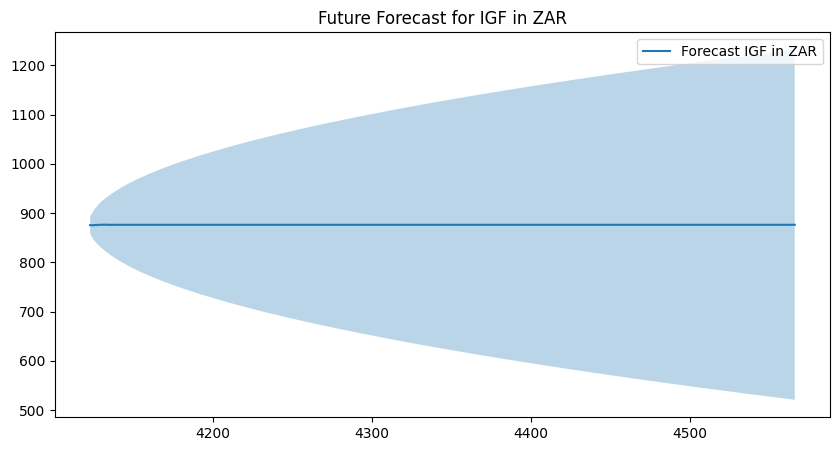

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=50.51 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=67973.027, Time=0.09 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=65966.288, Time=1.02 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=5.22 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=65964.331, Time=0.13 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=65966.291, Time=1.12 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=65966.882, Time=7.98 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=65242.362, Time=0.33 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=65244.259, Time=1.21 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=65244.260, Time=1.31 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=65246.268, Time=1.56 sec
 ARIMA(3,2,0)(0,0,0)[12]             : AIC=64787.818, Time=1.27 sec
 ARIMA(3,2,0)(1,0,0)[12]             : AIC=64789.108, Time=4.74 sec
 ARIMA(3,2,0)(0,0,1)[12]             : AIC=64789.113, Time=4.39 sec
 ARIMA(3,2,0)(1,

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


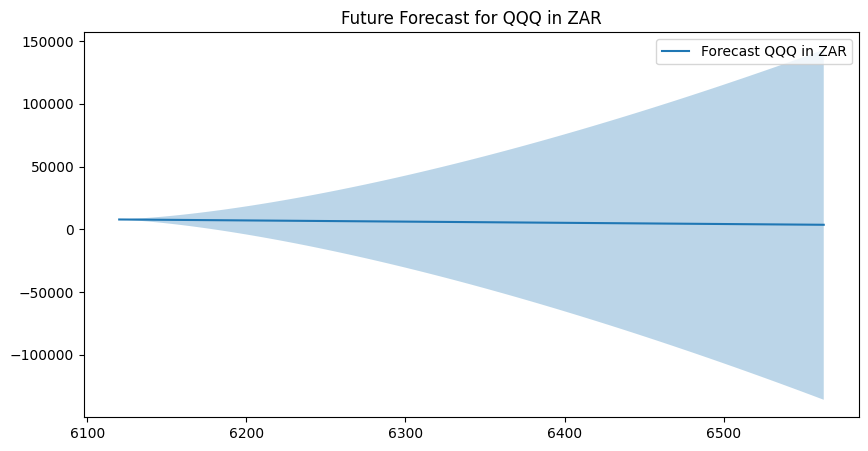

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=32657.888, Time=26.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=32664.104, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=32656.785, Time=2.76 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=32656.574, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=32662.365, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=32656.432, Time=0.79 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=32656.623, Time=2.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=32654.147, Time=15.76 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=32655.787, Time=36.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=32655.812, Time=32.67 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=32657.751, Time=10.75 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=32657.939, Time=9.13 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=32658.003, Time=31.67 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=32661.664, Time=6.64 sec

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


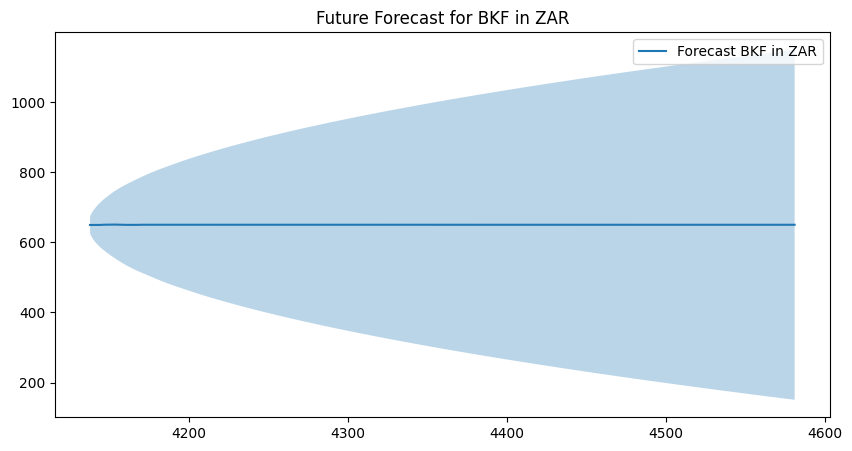

Forecasted portfolio value by 2060 in Rands is approximately R1546665.67


In [ ]:


# Define the tickers and their allocations
tickers = ['IGF',
           'QQQ',
           'BKF']

allocations = {'IGF': 0.20,
               'QQQ': 0.50,
               'BKF': 0.30}

aiden_initial_investment = 100000

# Exchange rate (update this rate as needed)
usd_to_zar_rate = 18.50

# Settings for the forecasting
start_date = '2000-01-01'
end_date = '2024-05-01'
n_periods = 12 * (2060 - 2023)

# Store forecasts for each ticker
portfolio_forecasts = {}

# Iterate over each ticker
for ticker in tickers:
    # Load data
    data = yf.download(ticker, start=start_date, end=end_date)['Close']

    # Convert data to ZAR
    data_zar = data * usd_to_zar_rate

    # Fit a seasonal ARIMA model
    model = pm.auto_arima(data_zar, seasonal=True, m=12, stepwise=True, suppress_warnings=True,
                          error_action="ignore", max_order=None, trace=True)

    # Forecasting
    forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Store forecast in ZAR for portfolio calculations
    portfolio_forecasts[ticker] = forecast * allocations[ticker]

    # Plot the results
    plt.figure(figsize=(10,
                        5))
    plt.plot(range(len(data_zar),
                   len(data_zar)
                    + n_periods),
             forecast,
             label=f'Forecast {ticker} in ZAR')
    plt.fill_between(range(len(data_zar),
                           len(data_zar) + n_periods),
                      conf_int[:, 0],
                     conf_int[:, 1],
                     alpha=0.3)
    plt.title(f'Future Forecast for {ticker} in ZAR')
    plt.legend()
    plt.show()

# Calculate and print the total forecasted portfolio value in Rands at the end of 2060
forecasted_values = np.sum([portfolio_forecasts[ticker] for ticker in tickers], axis=0)
total_portfolio_value = initial_investment + np.sum(forecasted_values)
print(f"Forecasted portfolio value by 2060 in Rands is approximately R{total_portfolio_value:.2f}")

# The forecasted portfolio value

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/w6yku4kf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/q77fcdsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64410', 'data', 'file=/tmp/tmpkql0ns3i/w6yku4kf.json', 'init=/tmp/tmpkql0ns3i/q77fcdsd.json', 'output', 'file=/tmp/tmpkql0ns3i/prophet_model5ryj6kxz/prophet_model-20240508192015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


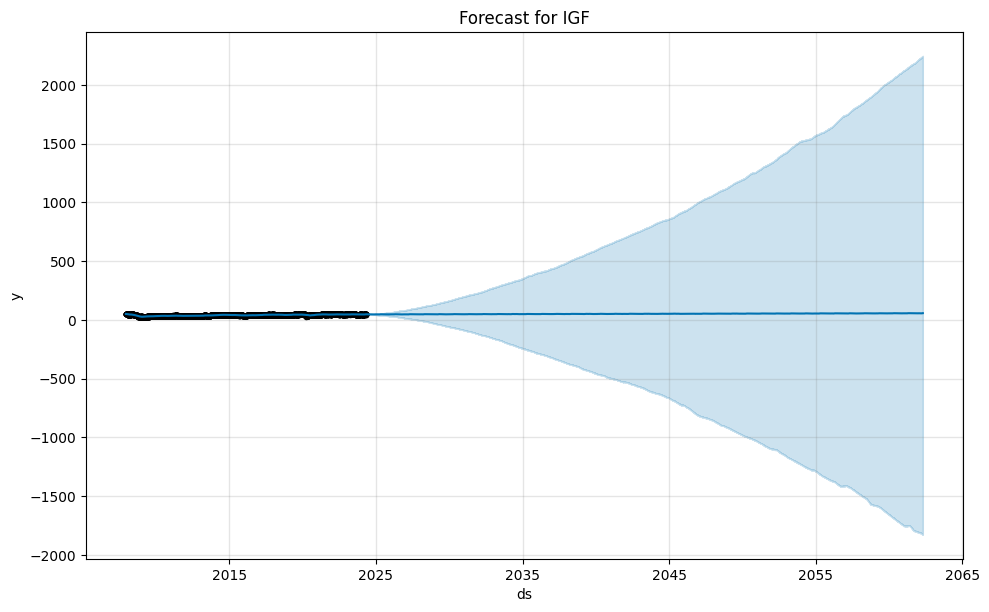

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/wyaoowqv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/po_x7s88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21349', 'data', 'file=/tmp/tmpkql0ns3i/wyaoowqv.json', 'init=/tmp/tmpkql0ns3i/po_x7s88.json', 'output', 'file=/tmp/tmpkql0ns3i/prophet_modelvl5svqtq/prophet_model-20240508192029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


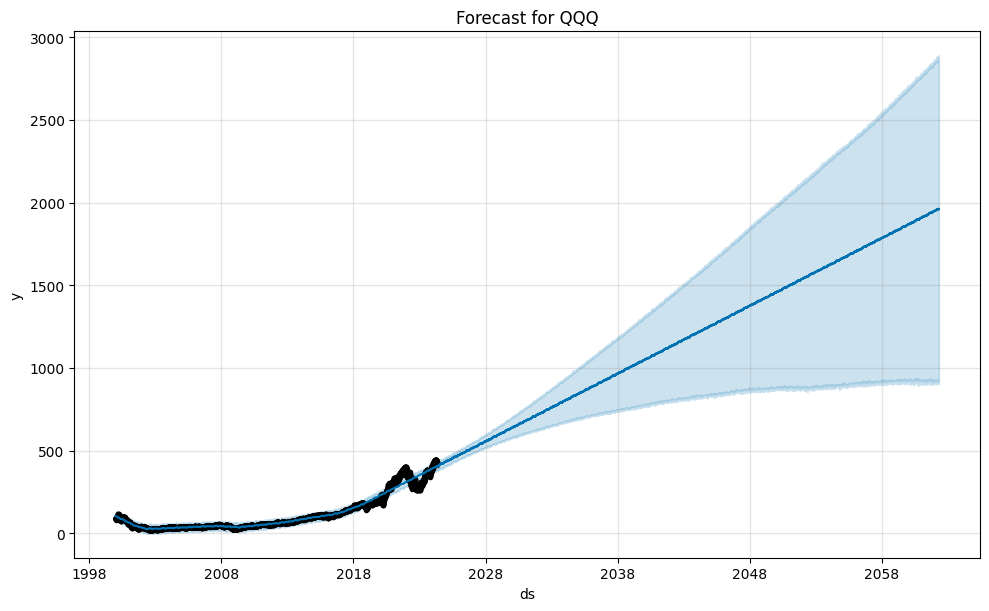

[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/g5j9cqgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkql0ns3i/5ckf0guq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44054', 'data', 'file=/tmp/tmpkql0ns3i/g5j9cqgs.json', 'init=/tmp/tmpkql0ns3i/5ckf0guq.json', 'output', 'file=/tmp/tmpkql0ns3i/prophet_modelq97recsu/prophet_model-20240508192040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


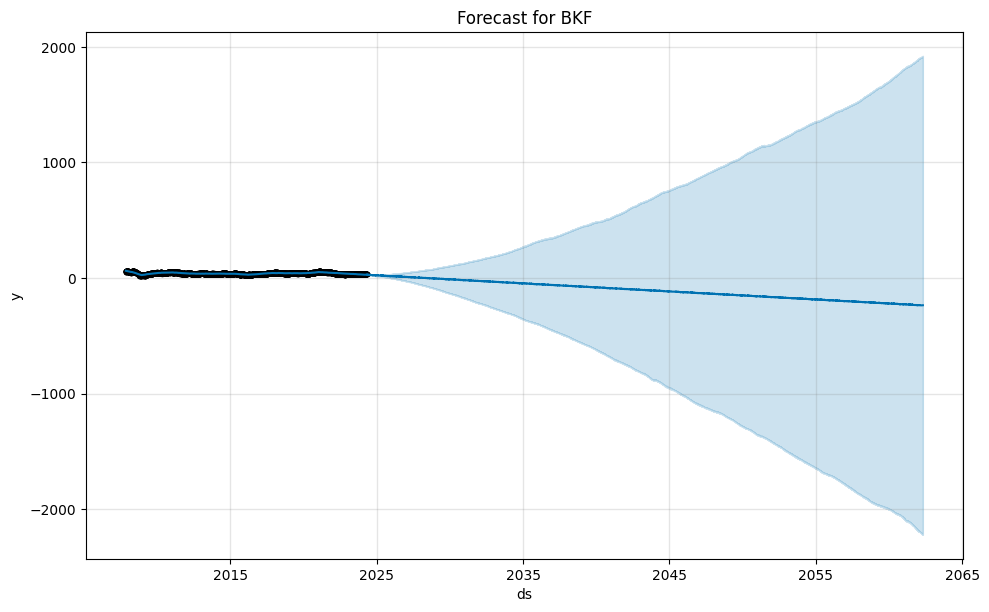

The forecasted portfolio value by around 2062-04-21 00:00:00 in Rands is approximately R1659960513.79


In [ ]:


# Define the tickers and their allocations, along with the initial investment amount
tickers = ['IGF',
           'QQQ',
           'BKF']
allocations = {'IGF': 0.20,
               'QQQ': 0.50,
               'BKF': 0.30}

initial_investment = 100000
usd_to_zar_rate = 18.00

# Function to fetch, forecast, and plot data using Prophet
def forecast_and_plot(ticker):
    # Download historical data
    data = yf.download(ticker, start='2000-01-01', end='2024-05-01')
    data = data.reset_index()[['Date', 'Close']]

    # Prepare data for Prophet
    data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

    # Initialize and fit the model
    model = Prophet(daily_seasonality=True)
    model.fit(data)

    # Create future dataframe and forecast
    future = model.make_future_dataframe(periods=365 * (2061 - 2023), freq='D')
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'Forecast for {ticker}')
    plt.show()

    return forecast.set_index('ds')['yhat']

# Fetch, forecast, and plot prices for each ticker
price_forecasts = {ticker: forecast_and_plot(ticker) for ticker in tickers}

# Compute the portfolio value over time
portfolio_value_usd = sum(price_forecasts[ticker]
                          * allocations[ticker]
                          * initial_investment for ticker in tickers)

portfolio_value_zar = portfolio_value_usd * usd_to_zar_rate  # Convert to ZAR

# Find the last value in the forecast close to 2060 and print it
last_forecast_date = price_forecasts[list(tickers)[0]].index[-1]
print(f"The forecasted portfolio value by around {last_forecast_date} in Rands is approximately R{portfolio_value_zar.loc[last_forecast_date]:.2f}")


In [ ]:
data = {
    "Method": ["Prophet",
               "pmdarima",
               "Monte Carlo",
               "Linear Regression"],

    "Projected Value (R)": [
        1659960513.79,  # Prophet projected value
        1546665.67,     # pmdarima projected value
        33802267.99,    # Monte Carlo projected value
        369351472.05    # Linear Regression projected value
    ]
}


df = pd.DataFrame(data)


display(df)

,Method,Projected Value (R)
0,Prophet,1.659961e+09
1,pmdarima,1.546666e+06
2,Monte Carlo,3.380227e+07
3,Linear Regression,3.693515e+08


# Sentiment Analysis of Headlines for QQQ ETF

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Headlines with Date and Sentiment:
2024-05-07 - Nvidia, Semiconductor Sales in Focus as SMH Holds Gains


(etf.com) - Negative
2024-05-06 - Companies are having their best earnings season in nearly 2 years


(Yahoo Finance) - Positive
2024-05-05 - Disney steps up as Big Tech steps back: What to know this week


(Yahoo Finance) - Neutral
2024-05-04 - Here's How Saving Just $5 per Day for 30 Years Can Create a $1 Million Portfolio


(Motley Fool) - Positive
2024-05-03 - Apple ETFs Jump on Earnings, $110B Buyback


(etf.com) - Neutral
2024-05-02 - How the Election May Affect the Sell in May Adage


(etf.com) - Neutral
2024-05-01 - Amazon ETFs Cheer Tech Giant's Strong Earnings


(etf.com) - Positive
2024-04-30 - U.S.-Domiciled ETFs Could Be Granted Equivalence in U.K.


(etf.com) - Positive
2024-04-29 - The stock market has a 'systemic problem'


(Yahoo Finance) - Negative
2024-04-28 - Before You Buy the Invesco QQQ ETF, Here Are 3 Others I'd Buy First


(Motley Fool) - Neutral
2024-04-26

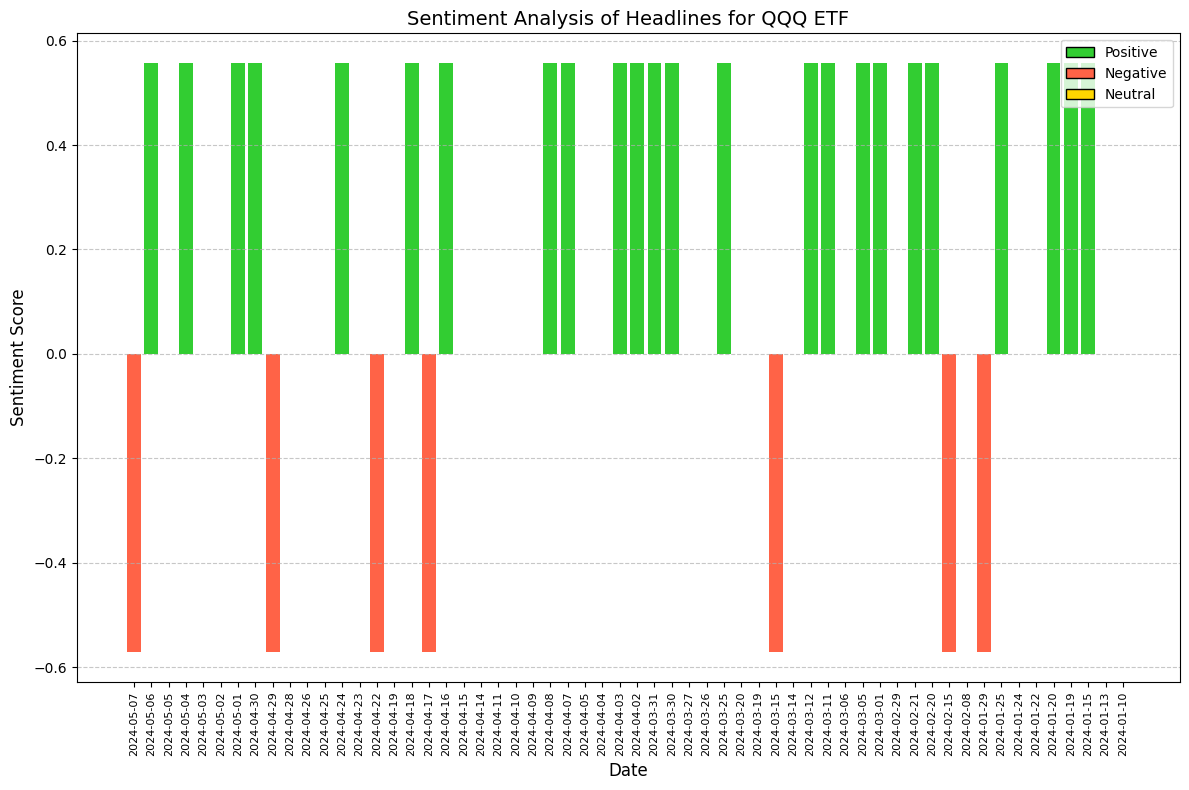

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')

# Define the URL for the QQQ stock ticker
url = 'https://finviz.com/quote.ashx?t=QQQ&p=d'

# Function to classify sentiment
def sentiment_analysis(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

try:
    # Send a request with headers to mimic a web browser
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the desired data
    table = soup.find('table', {'class': 'fullview-news-outer'})

    # Initialize NLTK's SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Initialize empty lists to store headlines and sentiments
    headlines = []
    dates = []
    sentiments = []

    # Iterate over rows in the table
    for row in table.find_all('tr'):
        # Extract the date and headline text
        cells = row.find_all('td')
        if len(cells) == 2:
            date_cell, headline_cell = cells

            # Attempt to parse the date with different formats
            date_formats = ['%b-%d-%y %I:%M%p', '%b-%d-%Y %I:%M%p', '%b-%d-%y', '%b-%d-%Y']
            for date_format in date_formats:
                try:
                    date = pd.to_datetime(date_cell.text.strip().split()[0], format=date_format).strftime('%Y-%m-%d')
                    break
                except ValueError:
                    continue
            else:
                continue

            # Append date, headline, and sentiment to lists
            headlines.append(headline_cell.text.strip())
            dates.append(date)
            sentiment_score = sia.polarity_scores(headline_cell.text.strip())['compound']
            sentiment = sentiment_analysis(sentiment_score)
            sentiments.append(sentiment)

    # Create a DataFrame from the lists
    df = pd.DataFrame({'Date': dates,
                       'Headline': headlines,
                       'Sentiment': sentiments})

    # Display headlines with date and sentiment
    print("Headlines with Date and Sentiment:")
    for idx, row in df.iterrows():
        print(f"{row['Date']} - {row['Headline']} - {row['Sentiment']}")

    # Plot the sentiment analysis graph
    plt.figure(figsize=(12, 8))
    colors = {'Positive': 'limegreen', 'Negative': 'tomato', 'Neutral': 'gold'}
    plt.bar(df['Date'], df['Sentiment'].apply(lambda x: sia.polarity_scores(x)['compound']),
            color=df['Sentiment'].map(colors))

    # Add a color legend
    plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color, ec="k") for color in colors.values()],
               labels=colors.keys(), loc='upper right')

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sentiment Score', fontsize=12)
    plt.title('Sentiment Analysis of Headlines for QQQ ETF', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error occurred:", e)


# Sentiment Analysis of Headlines for IGF ETF

Headlines with Date and Sentiment:
2022-02-07 - Windham Capital Management, LLC Buys iShares Core U.S. ...


(GuruFocus.com) - Neutral
2022-01-28 - Saybrook Capital  Buys Vanguard S&P 500 ETF, Cisco Systems Inc, Microsoft Corp


(GuruFocus.com) - Neutral
2022-01-25 - Kistler-Tiffany Companies, LLC Buys Vanguard S&P 500 ETF, PowerShares QQQ Trust Ser 1, ...


(GuruFocus.com) - Positive
2022-01-21 - Institute for Wealth Management, LLC. Buys Canadian Pacific Railway, iShares Russell 2000 ETF, ...


(GuruFocus.com) - Positive
2022-01-10 - Murphy Capital Management Inc Buys Thermo Fisher Scientific Inc, NVIDIA Corp, Schwab U.S. ...


(GuruFocus.com) - Neutral
2021-12-14 - VanEck Inflation Allocation ETF Buys Invesco Optimum Yield Diversified Commodity, iShares Gold ...


(GuruFocus.com) - Neutral
2021-08-11 - Infrastructure ETFs to watch in wake of Senate passing bipartisan infrastructure bill


(Yahoo Finance Video) - Neutral
2021-06-24 - ETFs to look at amid bipartisan infrastructure dea

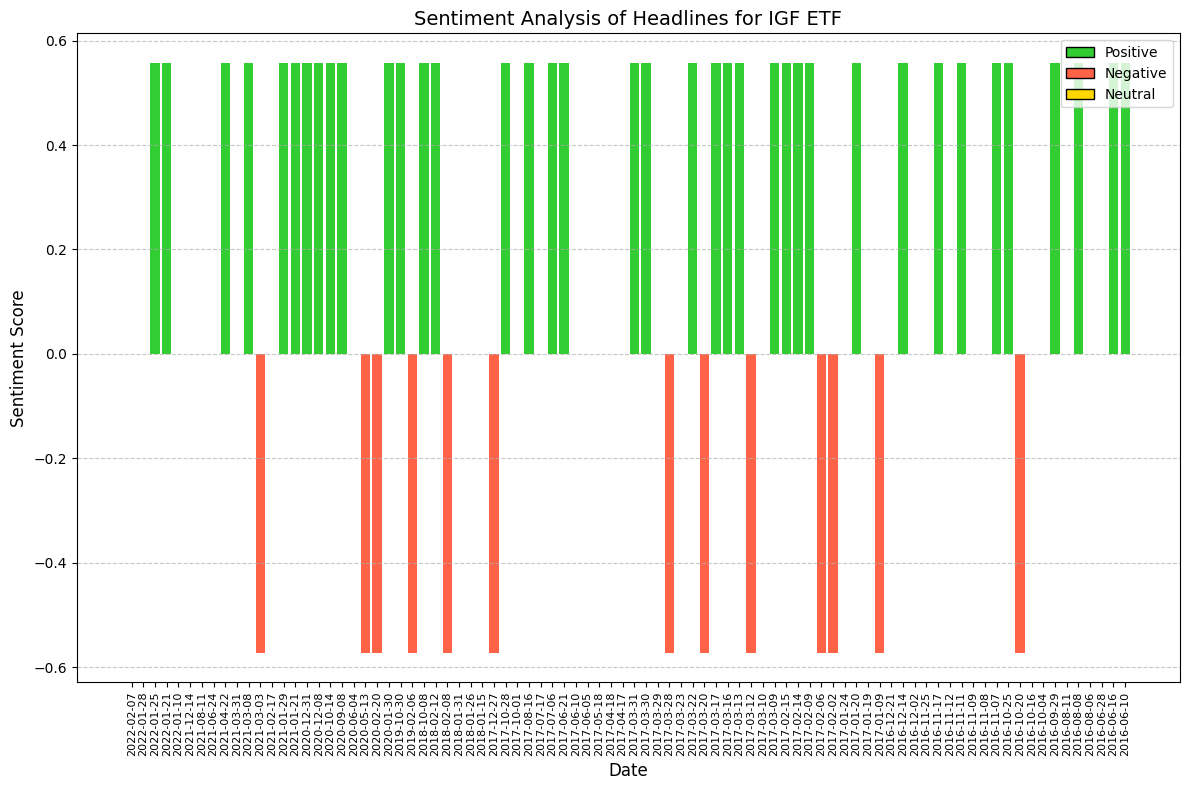

In [ ]:


url = 'https://finviz.com/quote.ashx?t=IGF&p=d'

# Function to classify sentiment
def sentiment_analysis(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

try:
    # Send a request with headers to mimic a web browser
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the desired data
    table = soup.find('table', {'class': 'fullview-news-outer'})

    # Initialize NLTK's SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Initialize empty lists to store headlines and sentiments
    headlines = []
    dates = []
    sentiments = []

    # Iterate over rows in the table (excluding header row)
    for row in table.find_all('tr')[1:]:
        # Extract the date and headline text
        cells = row.find_all('td')
        if len(cells) == 2:
            date_cell, headline_cell = cells

            # Attempt to parse the date with different formats
            date_formats = ['%b-%d-%y %I:%M%p', '%b-%d-%Y %I:%M%p', '%b-%d-%y', '%b-%d-%Y']
            for date_format in date_formats:
                try:
                    date = pd.to_datetime(date_cell.text.strip().split()[0], format=date_format).strftime('%Y-%m-%d')
                    break
                except ValueError:
                    continue
            else:
                continue

            # Append date, headline, and sentiment to lists
            headlines.append(headline_cell.text.strip())
            dates.append(date)
            sentiment_score = sia.polarity_scores(headline_cell.text.strip())['compound']
            sentiment = sentiment_analysis(sentiment_score)
            sentiments.append(sentiment)

    # Create a DataFrame from the lists
    df = pd.DataFrame({'Date': dates, 'Headline': headlines, 'Sentiment': sentiments})

    # Display headlines with date and sentiment
    print("Headlines with Date and Sentiment:")
    for idx, row in df.iterrows():
        print(f"{row['Date']} - {row['Headline']} - {row['Sentiment']}")

    # Plot the sentiment analysis graph
    plt.figure(figsize=(12, 8))
    colors = {'Positive': 'limegreen',
              'Negative': 'tomato',
              'Neutral': 'gold'}
    plt.bar(df['Date'], df['Sentiment'].apply(lambda x: sia.polarity_scores(x)['compound']),
            color=df['Sentiment'].map(colors))

    # Add a color legend
    plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color, ec="k") for color in colors.values()],
               labels=colors.keys(), loc='upper right')

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sentiment Score', fontsize=12)
    plt.title('Sentiment Analysis of Headlines for IGF ETF', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error occurred:", e)


# Sentiment Analysis of Headlines for BKF ETF

In [ ]:

import requests
import nltk

nltk.download('vader_lexicon')

# Define the URL for the BKF stock ticker
url = 'https://finviz.com/quote.ashx?t=BKF&p=d'

# Function to classify sentiment
def sentiment_analysis(compound_score):
    if compound_score > 0.05:
        return 'Positive'
    elif compound_score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

try:
    # Send a request with headers to mimic a web browser
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the desired data
    table = soup.find('table', {'class': 'fullview-news-outer'})

    # Initialize NLTK's SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Initialize empty lists to store headlines and sentiments
    headlines = []
    dates = []
    sentiments = []

    # Iterate over rows in the table
    for row in table.find_all('tr'):
        # Extract the date and headline text
        cells = row.find_all('td')
        if len(cells) == 2:
            date_cell, headline_cell = cells

            # Attempt to parse the date with different formats
            date_formats = ['%b-%d-%y %I:%M%p', '%b-%d-%Y %I:%M%p', '%b-%d-%y', '%b-%d-%Y']
            for date_format in date_formats:
                try:
                    date = pd.to_datetime(date_cell.text.strip().split()[0], format=date_format).strftime('%Y-%m-%d')
                    break
                except ValueError:
                    continue
            else:
                continue

            # Append date, headline, and sentiment to lists
            headlines.append(headline_cell.text.strip())
            dates.append(date)
            sentiment_score = sia.polarity_scores(headline_cell.text.strip())['compound']
            sentiment = sentiment_analysis(sentiment_score)
            sentiments.append(sentiment)

    # Create a DataFrame from the lists
    df = pd.DataFrame({'Date': dates,
                       'Headline': headlines,
                       'Sentiment': sentiments})

    # Display headlines with date and sentiment
    print("Headlines with Date and Sentiment:")
    for idx, row in df.iterrows():
        print(f"{row['Date']} - {row['Headline']} - {row['Sentiment']}")

    # Plot the sentiment analysis graph
    plt.figure(figsize=(12, 8))
    colors = {'Positive': 'limegreen', 'Negative': 'tomato', 'Neutral': 'gold'}
    plt.bar(df['Date'], df['Sentiment'].apply(lambda x: sia.polarity_scores(x)['compound']),
            color=df['Sentiment'].map(colors))

    # Add a color legend
    plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color, ec="k") for color in colors.values()],
               labels=colors.keys(), loc='upper right')

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sentiment Score', fontsize=12)
    plt.title('Sentiment Analysis of Headlines for BKF ETF', fontsize=14)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error occurred:", e)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Error occurred: name 'BeautifulSoup' is not defined


# **Qualitative Analysis **

**1. QQQ Performance during COVID-19 Pandemic**

[*********************100%%**********************]  1 of 1 completed


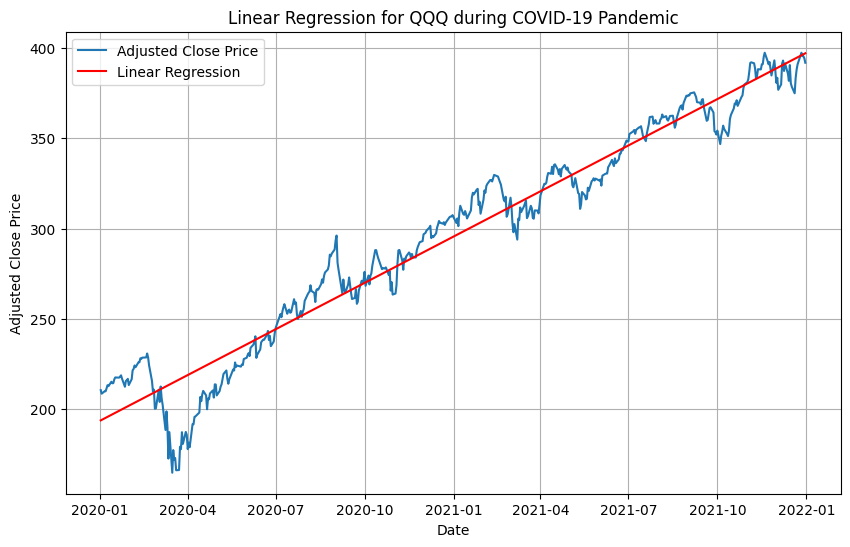

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress  # Importing linregress function
import yfinance as yf

# Function to plot linear regression graph for an ETF during COVID-19 pandemic
def linear_regression(ticker):
    # Download data for the ETF
    data = yf.download(ticker, start="2019-12-01", end="2022-01-01")['Adj Close']

    # Filter data for the COVID-19 pandemic period
    pandemic_data = data.loc['2020-01-01':'2021-12-31']

    # Perform linear regression
    regression = linregress(pandemic_data.index.map(pd.Timestamp.toordinal), pandemic_data.values)

    # Plot the ETF prices
    plt.figure(figsize=(10, 6))
    plt.plot(pandemic_data.index, pandemic_data.values, label='Adjusted Close Price')

    # Plot the linear regression line
    plt.plot(pandemic_data.index, regression.intercept + regression.slope * pandemic_data.index.map(pd.Timestamp.toordinal), color='red', label='Linear Regression')

    # Set plot title and labels
    plt.title(f'Linear Regression for {ticker} during COVID-19 Pandemic')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot linear regression graph for a specific ETF during COVID-19 pandemic
linear_regression('QQQ')


**2. IGF Performance during COVID-19 Pandemic**

[*********************100%%**********************]  1 of 1 completed


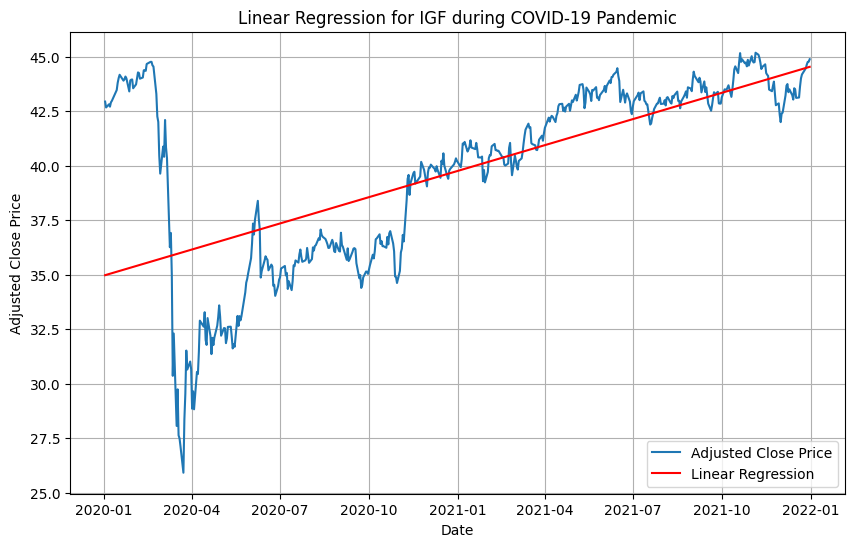

In [ ]:
# Function to plot linear regression graph for an ETF during COVID-19 pandemic
def linear_regression(ticker):
    # Download data for the ETF
    data = yf.download(ticker, start="2019-12-01", end="2022-01-01")['Adj Close']

    # Filter data for the COVID-19 pandemic period
    pandemic_data = data.loc['2020-01-01':'2021-12-31']

    # Perform linear regression
    regression = linregress(pandemic_data.index.map(pd.Timestamp.toordinal), pandemic_data.values)

    # Plot the ETF prices
    plt.figure(figsize=(10, 6))
    plt.plot(pandemic_data.index, pandemic_data.values, label='Adjusted Close Price')

    # Plot the linear regression line
    plt.plot(pandemic_data.index, regression.intercept + regression.slope * pandemic_data.index.map(pd.Timestamp.toordinal), color='red', label='Linear Regression')

    # Set plot title and labels
    plt.title(f'Linear Regression for {ticker} during COVID-19 Pandemic')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot linear regression graph for a specific ETF during COVID-19 pandemic
linear_regression('IGF')

**3. BKF Performance during COVID-19 Pandemic**

[*********************100%%**********************]  1 of 1 completed


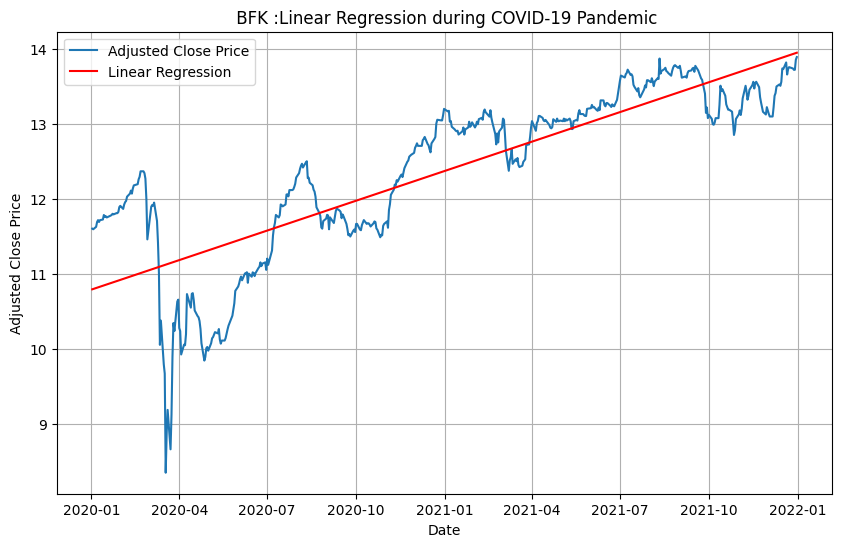

In [ ]:
# Function to plot linear regression graph for an ETF during COVID-19 pandemic
def linear_regression(ticker):
    # Download data for the ETF
    data = yf.download(ticker, start="2019-12-01", end="2022-01-01")['Adj Close']

    # Filter data for the COVID-19 pandemic period
    pandemic_data = data.loc['2020-01-01':'2021-12-31']

    # Perform linear regression
    regression = linregress(pandemic_data.index.map(pd.Timestamp.toordinal), pandemic_data.values)

    # Plot the ETF prices
    plt.figure(figsize=(10,
                        6))
    plt.plot(pandemic_data.index,
             pandemic_data.values,
             label='Adjusted Close Price')

    # Plot the linear regression line
    plt.plot(pandemic_data.index,
             regression.intercept +
             regression.slope *
             pandemic_data.index.map(pd.Timestamp.toordinal),
             color='red', label='Linear Regression')

    # Set plot title and labels
    plt.title(f' {ticker} :Linear Regression during COVID-19 Pandemic')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot linear regression graph for a specific ETF during COVID-19 pandemic
linear_regression('BFK')

**4. QQQ Performance during Ukraine Conflict**

[*********************100%%**********************]  1 of 1 completed


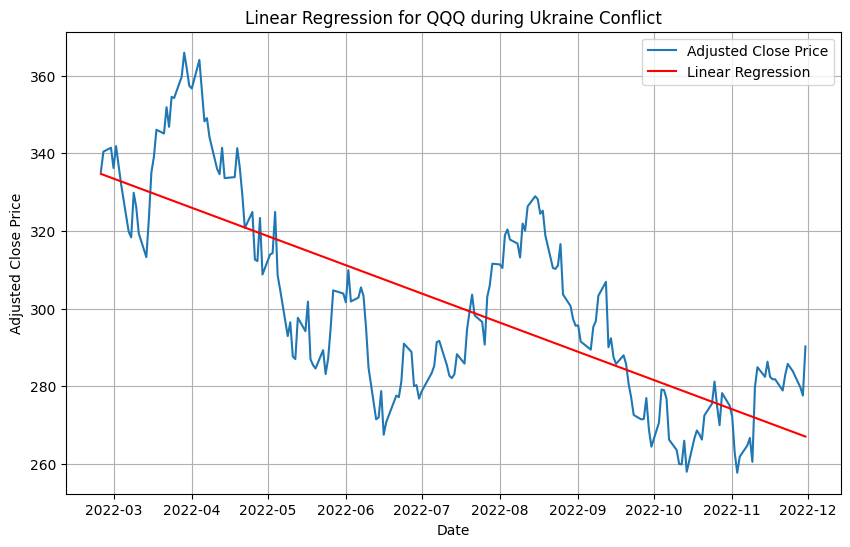

In [ ]:
# Function to plot linear regression graph for an ETF during the Ukraine conflict
def linear_regression(ticker):
    get_data = yf.download(ticker, start="2022-02-24", end="2022-12-01")['Adj Close']

    regression = linregress(get_data.index.map(pd.Timestamp.toordinal), get_data.values)

    plt.figure(figsize=(10, 6))
    plt.plot(get_data.index, get_data.values, label='Adjusted Close Price')


    plt.plot(get_data.index, regression.intercept
             + regression.slope *
             get_data.index.map(pd.Timestamp.toordinal),
             color='red',
             label='Linear Regression')

    plt.title(f'Linear Regression for {ticker} during Ukraine Conflict')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

linear_regression('QQQ')


**5. IFG Performance during Ukraine Conflict**


[*********************100%%**********************]  1 of 1 completed


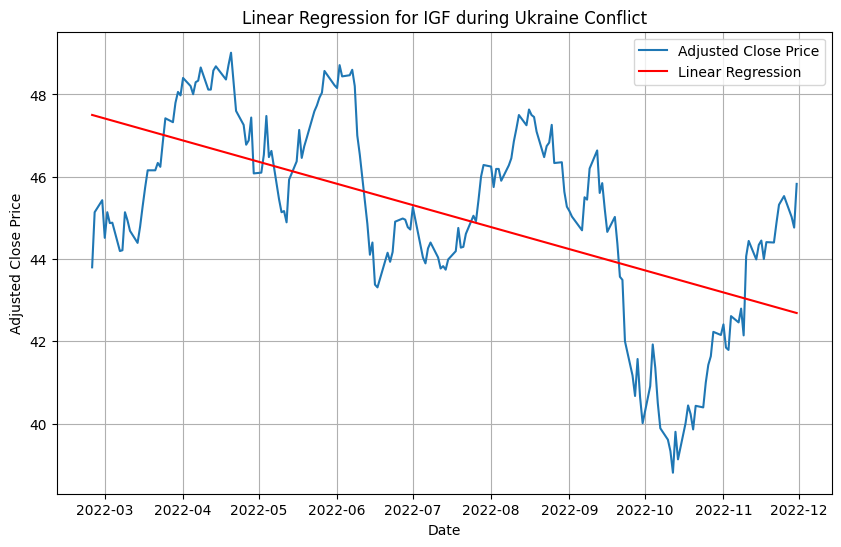

In [ ]:
# Function to plot linear regression graph for an ETF during the Ukraine conflict
def linear_regression(ticker):
    # Download data for the ETF
    get_data = yf.download(ticker, start="2022-02-24", end="2022-12-01")['Adj Close']

    # Perform linear regression
    regression = linregress(get_data.index.map(pd.Timestamp.toordinal), get_data.values)

    # Plot the ETF prices
    plt.figure(figsize=(10,
                        6))
    plt.plot(get_data.index,
             get_data.values,
             label='Adjusted Close Price')

    # Plot the linear regression line
    plt.plot(get_data.index, regression.intercept
             + regression.slope *
             get_data.index.map(pd.Timestamp.toordinal),
             color='red',
             label='Linear Regression')

    # Set plot title and labels
    plt.title(f'Linear Regression for {ticker} during Ukraine Conflict')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot linear regression graph for a specific ETF during the Ukraine conflict
linear_regression('IGF')

**6. BFK Performance during Ukraine Conflict**

[*********************100%%**********************]  1 of 1 completed


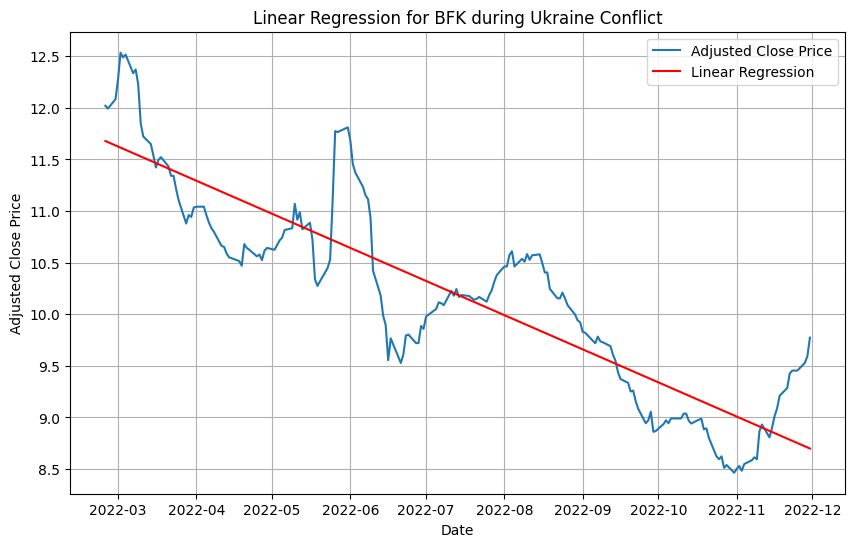

In [ ]:
# Function to plot linear regression graph for an ETF during the Ukraine conflict
def linear_regression(ticker):
    get_data = yf.download(ticker, start="2022-02-24", end="2022-12-01")['Adj Close']

    regression = linregress(get_data.index.map(pd.Timestamp.toordinal), get_data.values)

    plt.figure(figsize=(10,
                        6))
    plt.plot(get_data.index, get_data.values, label='Adjusted Close Price')

    plt.plot(get_data.index, regression.intercept
             + regression.slope *
             get_data.index.map(pd.Timestamp.toordinal),
             color='red', label='Linear Regression')


    plt.title(f'Linear Regression for {ticker} during Ukraine Conflict')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot linear regression graph for a specific ETF during the Ukraine conflict
linear_regression('BFK')



### Conclusion



| Portfolio Aspect                  | Details                                                                           |
|-------------------------|-----------------------------------------------------------------------------------|
| Portfolio type         | Tech EFTs , high-reward and high risk       |
| Growth Potential        |  Promising growth due to technolgical advancements and bullish market        |
| Risks                   |  Market may and economy might change                                            |
| Strategy Recommendation |   Needs to be monitored continously and subject to change in the future                                  |
| Aiden's Potential Outcome         |  High returns based on forecasted results|






The Aggessive approach portfoilio focused on technolgy EFTs and is very high risk and high rewards. This is a long-term strategy which might be changed in the future due to external factors. Based on the data we see great returns in 2060 for Aiden






Mbusi Mabena 216029072 - Reflection

While working on this assignment I strengthened my understanding of different python libraries like matplotlib, seaboarn , yfiance , beautifulsoup , prophet ,pmdarima, sklearn and pandas. These libraries played a crucial part in the development of the assignment. I learned how to do quantitative and qualitative analysis using Python which was the foundation of the assignment. This further helped me in unearthing meaningful insights and conclusions from the data.
My understanding of how to perform data analysis for financial markets grew because I had to read up on different strategies and create reasoning for the approach that we took. It was very interesting because we were not just working on sample data but real data that solves real-world problems.
This assignment made me cognisant of external factors when looking at what markets to invest in and how important it is to start investing money at an early as this is a long-term investment and made me more mindful of how I can manage money in the future or use these skills in my career.


Quintin Maffa 217042432 - Reflection

Exploring financial data and conducting data analysis has given me insights into market dynamics and the impact of geopolitical events on asset performance. This experience helped me better comprehend statistical techniques used in financial research, such as linear regression and correlation analysis. In addition, I improved my programming skills by using Python to retrieve, alter, and visualize financial data, which increased my competency in data analysis and visualization libraries. This assignment not only increased my knowledge of data analysis, but it also improved my problem-solving skills and programming ability.

Ntokozo Faithfully Miya 221061648 - Reflection

This assignment deepened my understanding of finance and data analysis. Through comparative analysis of investment strategies, I learned to interpret financial data and make informed decisions. Regression analysis highlighted the potential of aggressive growth assets, emphasizing the importance of data-driven approaches in crafting investment recommendations. Navigating diverse markets expanded my comprehension of risk assessment and market dynamics. Overall, this experience sharpened my analytical skills and reinforced the significance of strategic thinking in finance.
